In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# 전체 컬럼, 전체 행, 전체 숫자 출력
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

# warning message 제거
import warnings
warnings.filterwarnings('ignore')

# plot 출력
%matplotlib inline

# plot 한글출력
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'NanumGothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['NanumGothic']

# Intro 
# 영화산업 추세

In [5]:
# film_industry_scale.xlsx 파일 GitHub 에 없음
industry = pd.read_excel('../01.Data Collection/film_industry_scale.xlsx', index_col=0)

print(industry.shape)
industry.sample()

FileNotFoundError: [Errno 2] No such file or directory: '../01.Data Collection/film_industry_scale.xlsx'

In [ ]:
fig = go.Figure()

fig.add_trace( go.Bar(x=industry.index, y=industry['총매출'], name='총매출')  )
fig.add_trace( go.Line(x=industry.index, y=industry['관객수'], name= '관객수', line={'color': 'green'})) # line : 색 변경

In [ ]:
fig1 = go.Figure()
fig1.add_trace( go.Line(x=industry.index, y=industry['개봉편수'], name= '개봉편수') )
fig1.add_trace( go.Line(x=industry.index, y=industry['전국 스크린수'], name= '전국 스크린수') )

In [ ]:
fig2=go.Figure()
fig2.add_trace( go.Line(x=industry.index, y=industry['1인당 관람횟수'], name= '1인당 관람횟수' , line = {'color': 'pink'}) )

# 1. 감독, 작가, 배우 성비

In [2]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv')

print(df.shape)
df.sample()

(686, 38)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
431,그것만이 내 세상,20176104,2018-01-17,한국,한국,"코미디,드라마",12세이상관람가,장편,일반영화,"(주)제이케이필름,씨제이이앤엠(주)",씨제이이앤엠(주),95433,862,27441213382.000000,3417629,6258257482,759455,0,최성현,최성현,20174301,남자,감독,협상|그것만이 내 세상|역린,최성현,최성현,최성현,20174301,남자,감독,협상|그것만이 내 세상|역린,"이병헌,윤여정,박정민,한지민,김성령,이주영,최리,이가경,이상준,박현주,이소정,이정호...",이병헌,오준구 목소리,10055626,남자,배우,비상선언|백두산|남산의 부장들|그것만이 내 세상|남한산성|싱글라이더|마스터|매그니피...


In [29]:
columns = ['대표국적', '국적', '장르', '등급', '영화형태', '영화구분','제작사',
       '배급사', '상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수', '배우', '주연배우', '배역명',
       '배우코드', '배우성별', '배우_대표역할', '배우필모','대표감독', '감독코드', '감독성별', '감독_대표역할', '감독필모' ]
finalwriter=df.drop(columns, 1)

columns = ['대표국적', '국적', '장르', '등급', '영화형태', '영화구분','제작사',
       '배급사', '상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수','작가', '대표작가',
       '대표작가(필명)', '작가코드', '작가성별', '작가_대표역할', '작가필모', '배우', '주연배우', '배역명',
       '배우코드', '배우성별', '배우_대표역할', '배우필모']
finaldirector=df.drop(columns, 1)

columns = ['대표국적', '국적', '장르', '등급', '영화형태', '영화구분','제작사',
       '배급사', '상영횟수', '전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수','대표감독', '감독코드', '감독성별', '감독_대표역할', '감독필모', '작가', '대표작가',
       '대표작가(필명)', '작가코드', '작가성별', '작가_대표역할', '작가필모']
finalactor=df.drop(columns, 1)

## 감독 성비
감독이 여러명인 영화의 경우 박스오피스 데이터에서 첫 번째로 나오는 이름을 기준으로 반영함

감독성비(여/남) 1:6

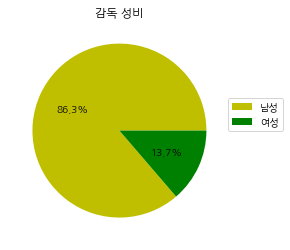

In [41]:
ax = finaldirector['감독성별'].value_counts().plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.legend(['남성', '여성'], loc=[1, 0.5])
plt.title('감독 성비')
plt.show()

## 작가 성비
작가가 여러명인 영화의 경우 박스오피스 데이터에서 첫 번째로 나오는 이름을 기준으로 반영함

작가성비(여/남) 1:4

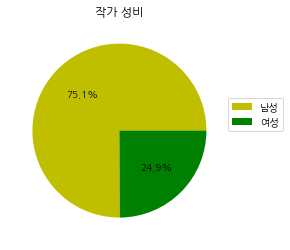

In [43]:
ax = finalwriter['작가성별'].value_counts().plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.legend(['남성', '여성'], loc=[1, 0.5])
plt.title('작가 성비')
plt.show()

## 배우 성비
배우성별은 박스오피스 데이터에서 첫 번째로 나오는 이름을 기준으로 반영함

배우성비(여/남) 1:3

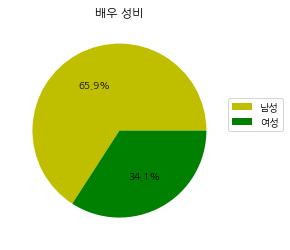

In [46]:
ax = finalactor['배우성별'].value_counts().plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.legend(['남성', '여성'], loc=[1, 0.5])
plt.title('배우 성비')
plt.show()

1. 감독, 작가, 배우 세 영역 모두 여성이 main role 로 영화에 참여하는 비율이 절반 미만
2. 감독->작가->배우 순으로 여성 main role 비율이 늘어남

## 1.1 다른 포지션 여성캐스팅에 영향력이 큰 롤이 무엇인지 확인

감독 > 작가 > 배우 순으로 다른 포지션에 미치는 영향력이 크다  
- 감독이 각본까지 쓰는 경우가 많아서 감독이 여성인 경우 여성작가 비율이 급격하게 올라감

영향력이 큰 포지션일수록 여성비율 낮다

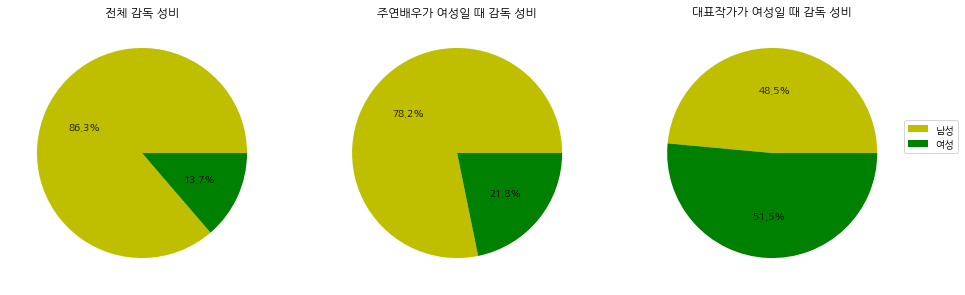

In [27]:
# 감독 성비
data = df.groupby('감독성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'감독 수'})

# 파이차트
plt.figure(figsize=[16, 6])
plt.subplot(1, 3, 1)
ax=data['감독 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('전체 감독 성비')

# 여자 주연배우일 때 감독 성비
data = df[df['배우성별'] == '여자'].groupby('감독성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'감독 수'})

# 파이차트
plt.subplot(1, 3, 2)
ax = data['감독 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('주연배우가 여성일 때 감독 성비')

# 여자 대표작가일 때 감독 성비
data = df[df['작가성별'] == '여자'].groupby('감독성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'감독 수'})

# 파이차트
plt.subplot(1, 3, 3)
ax = data['감독 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('대표작가가 여성일 때 감독 성비')
plt.legend(['남성', '여성'], loc=[1, 0.5])
plt.show()

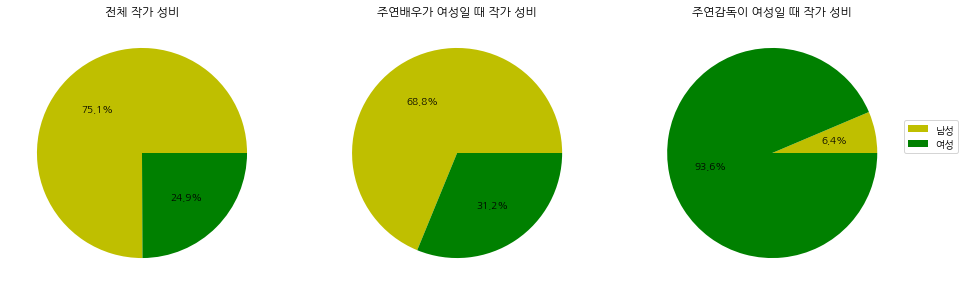

In [26]:
# 작가 성비
data = df.groupby('작가성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'작가 수'})

# 파이차트
plt.figure(figsize=[16, 6])
plt.subplot(1, 3, 1)
ax=data['작가 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('전체 작가 성비')

# 여자 주연배우일 때 작가 성비
data = df[df['배우성별'] == '여자'].groupby('작가성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'작가 수'})

# 파이차트
plt.subplot(1, 3, 2)
ax = data['작가 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('주연배우가 여성일 때 작가 성비')

# 여자 대표감독일 때 작가 성비
data = df[df['감독성별'] == '여자'].groupby('작가성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'작가 수'})

# 파이차트
plt.subplot(1, 3, 3)
ax = data['작가 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('주연감독이 여성일 때 작가 성비')
plt.legend(['남성', '여성'], loc=[1, 0.5])
plt.show()

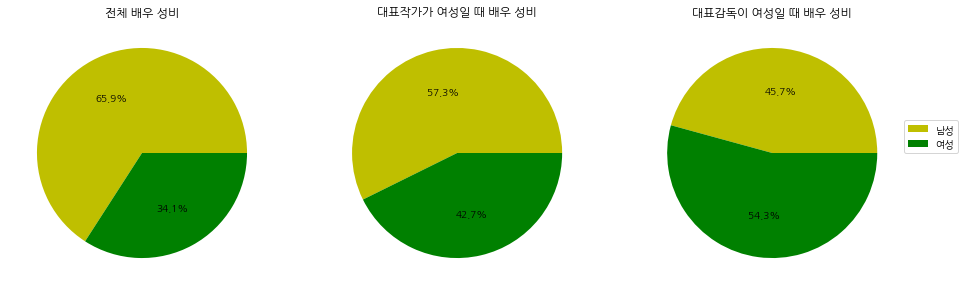

In [25]:
# 배우 성비 
data = df.groupby('배우성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'배우 수'})

# 파이차트
plt.figure(figsize=[16, 6])
plt.subplot(1, 3, 1)
ax = data['배우 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('전체 배우 성비')

# 여성 대표작가일 때 배우 성비
data = df[df['작가성별'] == '여자'].groupby('배우성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'배우 수'})

# 파이차트
plt.subplot(1, 3, 2)
ax = data['배우 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('대표작가가 여성일 때 배우 성비')

# 여성 대표감독일 때 배우 성비
data = df[df['감독성별'] == '여자'].groupby('배우성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'배우 수'})

# 파이차트
plt.subplot(1, 3, 3)
ax = data['배우 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('대표감독이 여성일 때 배우 성비')
plt.legend(['남성', '여성'], loc=[1, 0.5])
plt.show()

### 감독이 각본까지 쓰는 경우가 많다. 얼마나 되는지 보자
대표감독이 곧 대표작가인 경우가 60 %

감독성비 자체가 1:6 으로 기울어 있으므로 감독-작가의 남성 비율이 높아 F-등급이 낮은 영화가 많을 수 밖에 없음

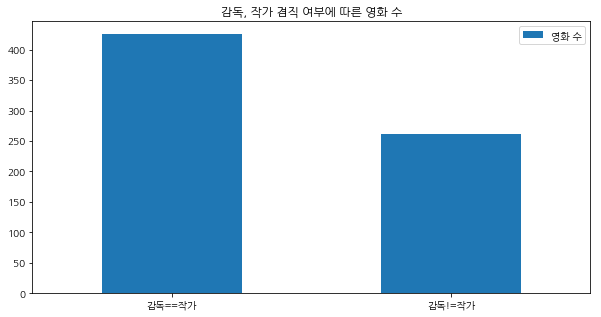

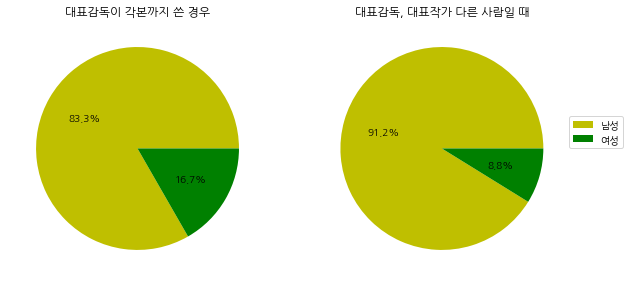

In [240]:
data = df[df['감독코드'] == df['작가코드']]['감독성별'].value_counts().reset_index()
data = pd.DataFrame(data['감독성별']).rename(columns={'감독성별':'감독==작가'})
data['감독!=작가'] = df[df['감독코드'] != df['작가코드']]['감독성별'].value_counts().reset_index()['감독성별']
data['감독성별'] = ['남자', '여자']

data_director_writer = pd.DataFrame([354 + 71, 238 + 23]
             , index=['감독==작가', '감독!=작가']
            ).rename(columns={0:'영화 수'})
data_director_writer

# 감독, 작가 겸직 여부에 따른 영화 수
data_director_writer.plot.bar()
plt.xticks(rotation=0)
plt.title('감독, 작가 겸직 여부에 따른 영화 수')
plt.show()

# 감독==작가 같은 경우, 다른 경우 성비
plt.subplot(1, 2, 1)
ax = data['감독==작가'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('대표감독이 각본까지 쓴 경우')
# sns.barplot(y='감독==작가',x='감독성별', data=data, palette=['y', 'g'])
# plt.ylim(0, 400)

plt.subplot(1, 2, 2)
ax = data['감독!=작가'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('대표감독, 대표작가 다른 사람일 때')
plt.legend(['남성', '여성'], loc=[1, 0.5])
# sns.barplot(y='감독!=작가',x='감독성별', data=data, palette=['y', 'g'])
# plt.ylim(0, 400)
plt.show()


감독이 각본까지 쓰는 경우가 전체의 60 %

대표감독, 대표작가가 다른 사람일 때는 여성작가 비율이 더 낮아진다

# 2. F 등급별 영화 수

In [8]:
data =df.groupby('F-rated')['영화코드'].size().reset_index()
F_rated_count = data.rename(columns={'영화코드': '영화 수'})
F_rated_count['전체 영화 중 비율(%)'] = round(F_rated_count['영화 수'] * 100/ sum(F_rated_count['영화 수']), 2)
F_rated_count

,F-rated,영화 수,전체 영화 중 비율(%)
0,0,349,50.870000
1,1,225,32.800000
2,2,62,9.040000
3,3,50,7.290000


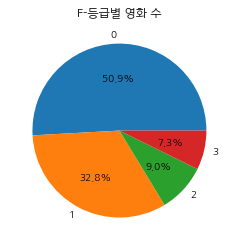

In [59]:
# 파이차트
ax = F_rated_count['영화 수'].plot.pie(autopct='%.1f%%')
ax.set_ylabel('')
plt.title('F-등급별 영화 수')
plt.show()

# 2.1 성비 - F 등급

## 감독 성별에 따른 여성(작가, 배우) 기용 수

In [10]:
# 대표감독 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['감독성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['감독성별'] == '여자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '여자']['영화 수'])
data.loc[data['감독성별'] == '남자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '남자']['영화 수'])
data['감독성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['감독성별 전체 영화 수'], 2)

# F-rated 지수에서 감독 본인 성별 제외
data['F-rated(without_self)'] = data['F-rated']
data.loc[data['감독성별'] == '여자', 'F-rated(without_self)'] = data['F-rated'] - 1

F_rated_by_director_sex = data
F_rated_by_director_sex

,감독성별,F-rated,영화 수,감독성별 전체 영화 수,감독성별에 따른 F-rated 지수 비율(%),F-rated(without_self)
0,남자,0,349,592.000000,58.950000,0
1,남자,1,220,592.000000,37.160000,1
2,남자,2,23,592.000000,3.890000,2
3,여자,1,5,94.000000,5.320000,0
4,여자,2,39,94.000000,41.490000,1
5,여자,3,50,94.000000,53.190000,2


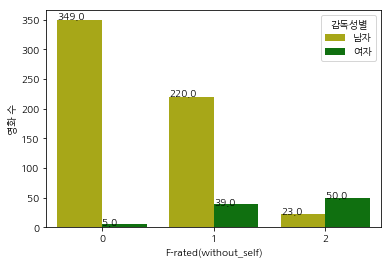

In [11]:
# 대표감독성별에 따른 여성(작가, 배우) 기용 수
ax = sns.barplot(x='F-rated(without_self)', y='영화 수',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

남성 감독의 경우 60 % 가 여성을 전혀 기용하지 않고, 2 명 모두 여성을 기용한 경우는 전체의 4 % 수준

여성 감독의 경우 2 명 모두를 여성으로 기용한 경우가 전체의 60 %
    
    → 여성 감독들이 남성 감독에 비해 여성 배우, 여성 작가와 협업하는 비율이 높다
    → 감독이 여성인 경우, 약 95 % 가 주연배우나 작가 중 여성을 1 명 이상 기용한다

### 작가 성별에 따른 여성(감독, 배우) 기용 수

In [21]:
# 대표작가 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['작가성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['작가성별'] == '여자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '여자']['영화 수'])
data.loc[data['작가성별'] == '남자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '남자']['영화 수'])
data['작가성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['작가성별 전체 영화 수'], 2)

# F-rated 지수에서 감독 본인 성별 제외
data['F-rated(without_self)'] = data['F-rated']
data.loc[data['작가성별'] == '여자', 'F-rated(without_self)'] = data['F-rated'] - 1

F_rated_by_director_sex = data
F_rated_by_director_sex

,작가성별,F-rated,영화 수,작가성별 전체 영화 수,작가성별에 따른 F-rated 지수 비율(%),F-rated(without_self)
0,남자,0,349,515.000000,67.770000,0
1,남자,1,165,515.000000,32.040000,1
2,남자,2,1,515.000000,0.190000,2
3,여자,1,60,171.000000,35.090000,0
4,여자,2,61,171.000000,35.670000,1
5,여자,3,50,171.000000,29.240000,2


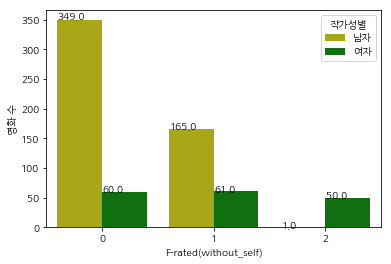

In [22]:
# 대표작가성별에 따른 여성(감독, 배우) 기용 수
ax = sns.barplot(x='F-rated(without_self)', y='영화 수',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

대표 작가가 남성일 때, 감독과 배우 모두 여성을 기용한 경우는 515 편의 영화 중 단 1편

    대표 작가가 남성인 경우, 대표 감독이 남성인 경우보다 여성을 기용하는 경우가 적다

대표 작가가 여성일 때, 여성 0 ~ 2 명 전반에 고르게 분포

    대표 감독이 여성일 때보다는 여성 기용 수가 적음

### 주연배우 성별에 따른 여성(감독, 작가) 기용 수

In [24]:
# 주연배우 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['배우성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['배우성별'] == '여자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '여자']['영화 수'])
data.loc[data['배우성별'] == '남자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '남자']['영화 수'])
data['배우성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['배우성별 전체 영화 수'], 2)

# F-rated 지수에서 배우 본인 성별 제외
data['F-rated(without_self)'] = data['F-rated']
data.loc[data['배우성별'] == '여자', 'F-rated(without_self)'] = data['F-rated'] - 1

F_rated_by_director_sex = data
F_rated_by_director_sex

,배우성별,F-rated,영화 수,배우성별 전체 영화 수,배우성별에 따른 F-rated 지수 비율(%),F-rated(without_self)
0,남자,0,349,452.000000,77.210000,0
1,남자,1,65,452.000000,14.380000,1
2,남자,2,38,452.000000,8.410000,2
3,여자,1,160,234.000000,68.380000,0
4,여자,2,24,234.000000,10.260000,1
5,여자,3,50,234.000000,21.370000,2


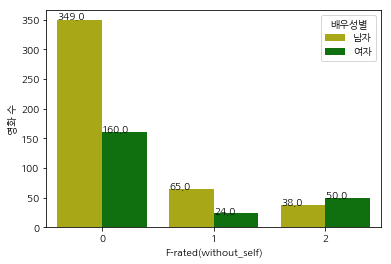

In [25]:
# 주연배우성별에 따른 여성(감독, 작가) 기용 수
ax = sns.barplot(x='F-rated(without_self)', y='영화 수',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

주연배우가 여성인 영화(34 %)가 대표감독(13.7 %)이나 대표작가(25 %)가 여성인 영화에 비해 월등히 많다

    → 에로영화 때문인지 살펴보기

주연배우가 남성일 때 77 % 가 감독, 작가도 남성이다

    → 대표감독이나 대표작가가 남성인 영화에 비해서도 훨씬 여성 기용 수가 적다

### 여성주연이 많은 이유- 에로영화 때문인지 살펴보기

여성주연 영화 중 드라마, 다큐멘터리, 애니메이션이 전체의 63 %
    
    에로영화는 대부분 [청소년관람불가-멜로/로맨스] 에 속하므로 에로영화 때문에 여성주연영화 중 1-F 등급 영화가 많았던 것은 아니다 

다큐멘터리, 애니메이션, 멜로/로맨스 에서 여성주연배우가 많음

### 데이터 전처리하면서 에로영화 제거
관객수 1인 데이터가 전체의 25 % -> 거의 다 에로영화

관객수 1인 데이터 제거 후 중간값(관객수 591명)이상 데이터만 남김

In [69]:
# 장르별로 보기위해 장르가 여러개인 영화의 경우 맨 앞에 있는 장르 하나만 가져와 대표장르로 저장
df['대표장르'] = df['장르'].apply(lambda x: str(x).split(',')[0])
df[df['F-rated'] == 1]['대표장르'].value_counts()

드라마       69
다큐멘터리     42
애니메이션     25
멜로/로맨스    17
미스터리      13
코미디       13
스릴러       11
사극         8
공포(호러)     8
범죄         8
액션         4
가족         3
판타지        2
기타         1
공연         1
Name: 대표장르, dtype: int64

### 여성주연비율과 등급-장르의 관계

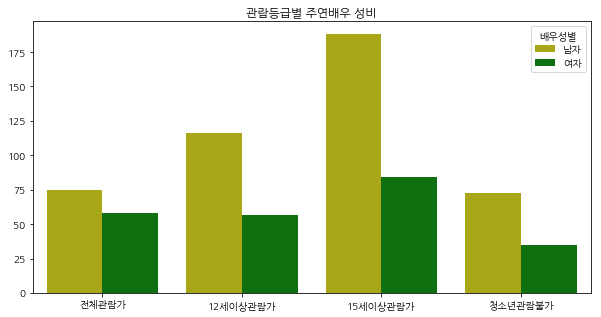

In [246]:
# 영화 등급별 주연배우 성비
data = df.groupby(['배우성별', '등급'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
ax = sns.barplot(y='영화 수', hue='배우성별', x='등급', data=data, order=(['전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가']), palette=['y', 'g'])
ax.set_ylabel('')
ax.set_xlabel('')
plt.title('관람등급별 주연배우 성비')
plt.show()

In [ ]:
# stack 차트가 나으려나
# 등급별 파이차트?

전체관람가에서 여성주연배우 비율이 높다

청소년관람불가에서도 여성주연배우 비율이 높은 편이나 관객수 1인 데이터(에로영화)를 삭제하면서 다른 등급과 비슷한 수준으로 줄어듬

전체 영화수가 많은 등급일수록 (12세이상관람가, 15세이상관람가) 여성주연배우 비율이 낮다
    
    → 등급별로 장르를 구분해서 살펴보기

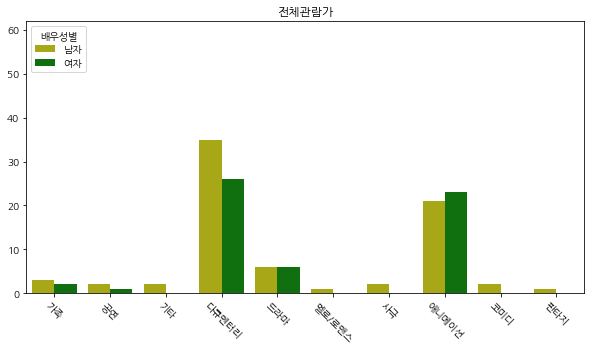

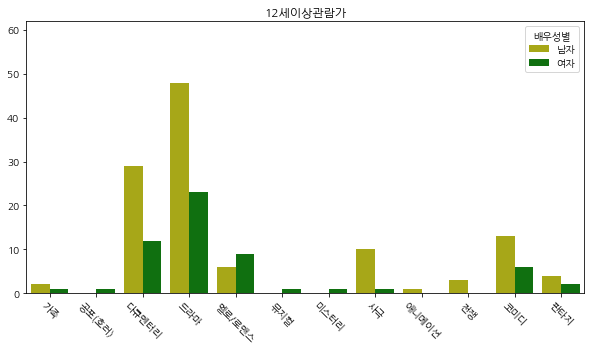

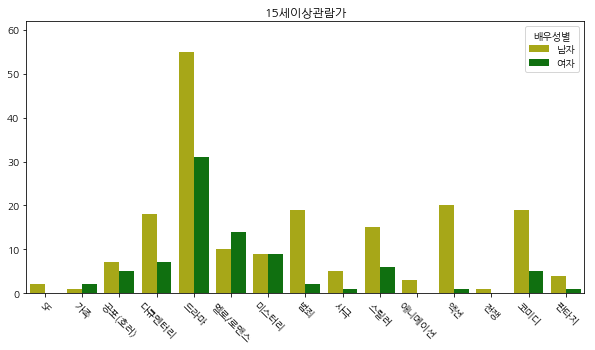

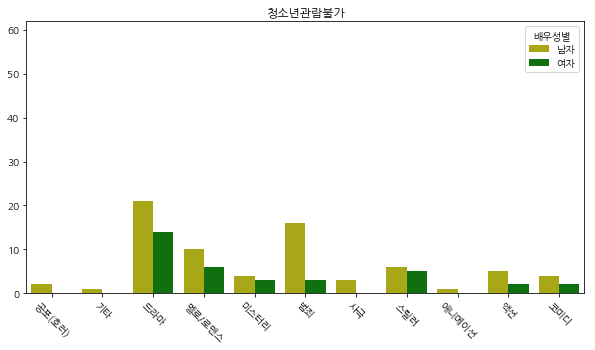

In [291]:
data = df.groupby(['대표장르', '등급', '배우성별'])['영화코드'].size().reset_index()

ax = sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '전체관람가'], palette=['y', 'g'])
ax.set_ylabel('')
ax.set_xlabel('')
plt.ylim(0, 62)
plt.title('전체관람가')
plt.xticks(rotation=-45)
plt.show()

ax = sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '12세이상관람가'], palette=['y', 'g'])
ax.set_ylabel('')
ax.set_xlabel('')
plt.ylim(0, 62)
plt.title('12세이상관람가')
plt.xticks(rotation=-45)
plt.show()

ax = sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '15세이상관람가'], palette=['y', 'g'])
ax.set_ylabel('')
ax.set_xlabel('')
plt.ylim(0, 62)
plt.title('15세이상관람가')
plt.xticks(rotation=-45)
plt.show()

ax = sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '청소년관람불가'], palette=['y', 'g'])
ax.set_ylabel('')
ax.set_xlabel('')
plt.ylim(0, 62)
plt.title('청소년관람불가')
plt.xticks(rotation=-45)
plt.show()

#### 여성주연 비율 높은 등급-장르
- 전체관람가: 다큐멘터리(42 %) , 애니메이션(52 %), 드라마(50 %)
- 12세이상관람가: 멜로/로맨스(60 %)
- 15세이상관람가: 멜로/로맨스(58 %), 미스터리(50 %)
- 청소년관람불가: 스릴러(45 %)

    → 대부분의 에로영화가 청소년관람불가-멜로/로맨스 로 분류되어 데이터를 관객수 기준으로 잘라내기 전에는 청소년관람불가-멜로/로맨스 장르에 여성주연비율이 높았음(약 50 %)

    → 미스터리, 스릴러의 경우 여성주연일 때 더 무서우니까 그런가?

#### 여성주연 비율이 특히 낮은 등급-장르
- 전체관람가: 
- 12세이상관람가: 사극(0 %), 전쟁(0 %)
- 15세이상관람가: 액션(5 %), 범죄(10 %), 코미디(20 %)
- 청소년관람불가: 범죄(16 %)

    → 전쟁, 액션, 범죄, 사극은 남성의 전유물
    
    → 코미디는 15세이상관람가에서 가장 영화수가 많고, 가장 여성주연비율이 낮다
        임창정, 정상훈, 공형진, 유해진, 최성국 등 코미디물을 전문으로하는 남성주연배우는 꽤 있는데, 코미디 여성주연배우는 풀 자체가 없는 듯
    
    작품이 없다
    
    삭발이나 망가지는 코미디물 여자들이 안할거라고 생각함
    
    여성배우의 경우 이미지 변신이 상대적으로 어렵다
    
#### 특이점
[전체관람가-다큐멘터리]에서는 여성주연비율이 50% 가까이 되는데, 12세이상관람가와 15세이상관람가로 등급이 높아질수록 여성주연비율이 20% 대까지 낮아진다


[전체관람가-애니메이션]에서는 여성주연비율이 50% 이상인데, 나머지 등급에서는 여성주연이 거의 없다


[사극]에서는 여성주연 영화를 거의 찾아보기 힘들다 

#### 여성 주연배우 비율이 높은 등급과 장르 
[전체관람가-다큐멘터리], [전체관람가-애니메이션], [12세이상관람가-멜로/로맨스], [15세이상관람가-멜로/로맨스]
     
     → 다큐멘터리의 배우는 전업 배우가 아니라 대부분 일반인이고, 애니메이션의 배우는 대부분 성우라는 점을 감안하면 여성 배우에게 주어진 파이가 정말 작다는 것을 알 수 있음

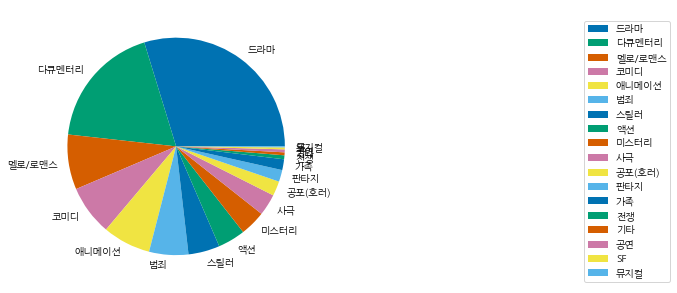

In [358]:
# 장르 파이차트
data = df.groupby(['대표장르'])['영화코드'].size().reset_index()
data = data.sort_values('영화코드', ascending=False)
ax = data.set_index('대표장르').plot.pie(y='영화코드')
ax.set_ylabel('')
plt.legend(loc=[2, 0])
plt.show()

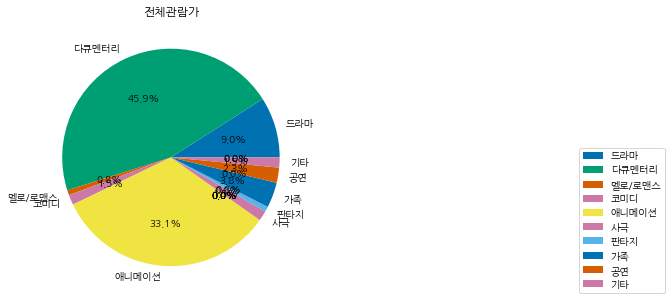

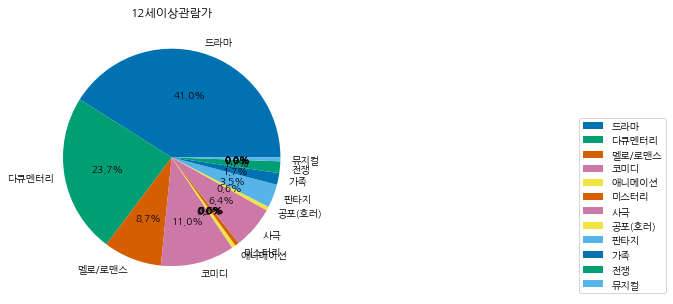

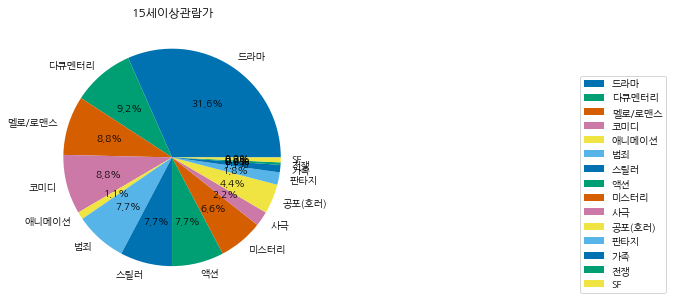

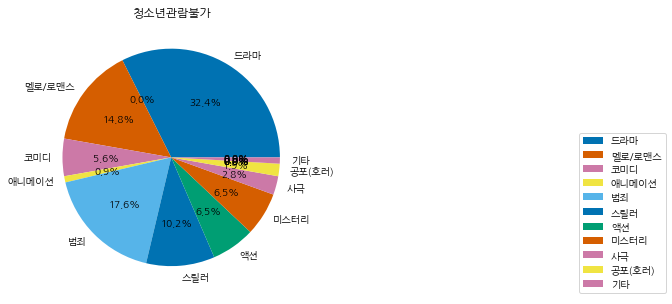

In [342]:
# 등급별 장르 파이차트
data = df[df['등급'] == '전체관람가'].groupby(['대표장르'])['영화코드'].size().reset_index().rename(columns={'영화코드': '영화 수'})
data = data.rename(columns={'영화 수':'전체관람가'})
data = data.merge(df[df['등급'] == '12세이상관람가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'12세이상관람가'})
data = data.merge(df[df['등급'] == '15세이상관람가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'15세이상관람가'})
data = data.merge(df[df['등급'] == '청소년관람불가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'청소년관람불가'})
data = data.merge(df.groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'전체등급'})
data

data_grade_genre = data.sort_values('전체등급', ascending=False).transpose().reset_index()
data_grade_genre.columns = data_grade_genre.iloc[0]
data_grade_genre = data_grade_genre.drop(data_grade_genre.index[0]).rename(columns={'대표장르':'등급'})
data_grade_genre = data_grade_genre.rename(columns={'대표장르':'등급'})
data_grade_genre = data_grade_genre.fillna(0)
data_grade_genre = data_grade_genre.set_index('등급')

data_grade_genre
# plt.figure(figsize=[16, 6])

# print(plt.style.available)
plt.style.use('seaborn-colorblind')

ax = data_grade_genre.transpose().plot.pie(autopct='%.1f%%', y='전체관람가')
ax.set_ylabel('')
plt.title('전체관람가')
plt.legend(loc=[2,0])

ax = data_grade_genre.transpose().plot.pie(autopct='%.1f%%', y='12세이상관람가')
ax.set_ylabel('')
plt.title('12세이상관람가')
plt.legend(loc=[2,0])

ax = data_grade_genre.transpose().plot.pie(autopct='%.1f%%', y='15세이상관람가')
ax.set_ylabel('')
plt.title('15세이상관람가')
plt.legend(loc=[2,0])

ax = data_grade_genre.transpose().plot.pie(autopct='%.1f%%', y='청소년관람불가')
ax.set_ylabel('')
plt.title('청소년관람불가')
plt.legend(loc=[2,0])
plt.show()

전체관람가는 다큐멘터리(46 %)와 애니메이션(34 %)이 80 %

전체관람가를 제외한 모든 등급에서 드라마가 1순위 (3-40 %)

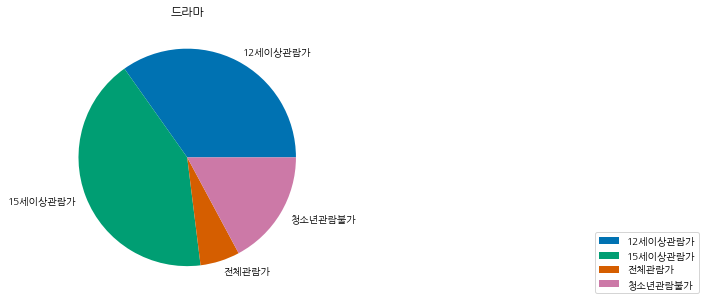

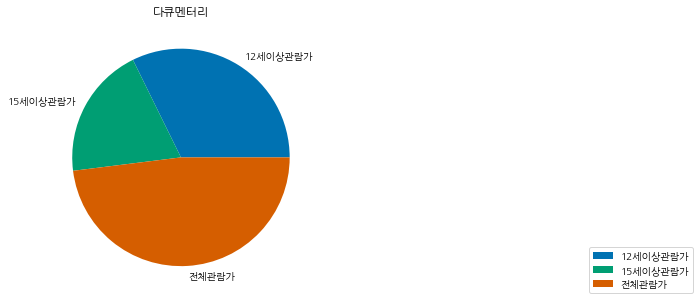

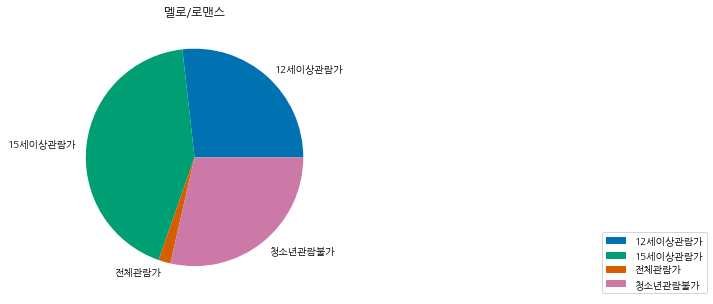

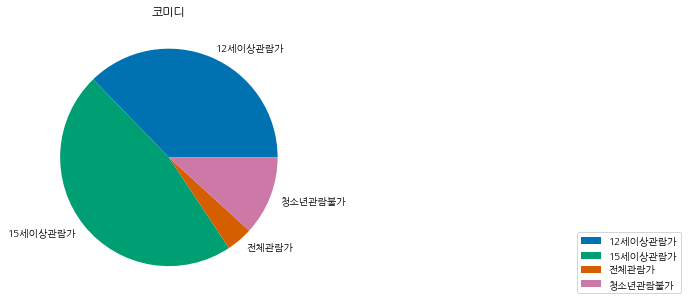

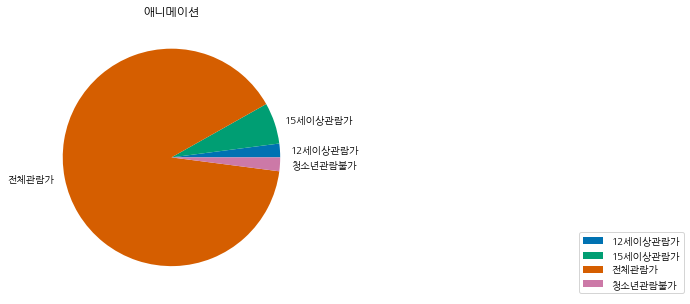

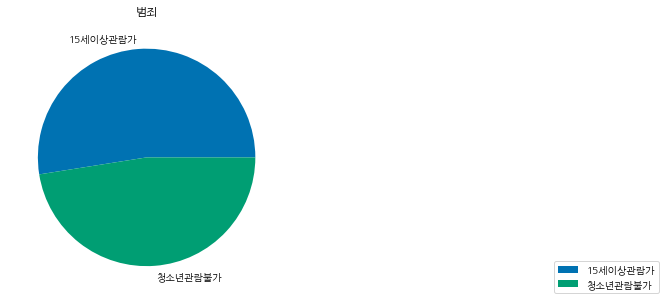

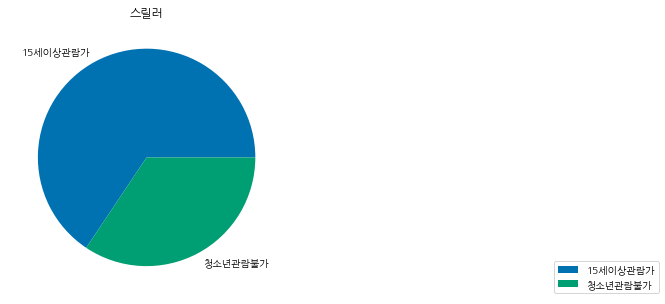

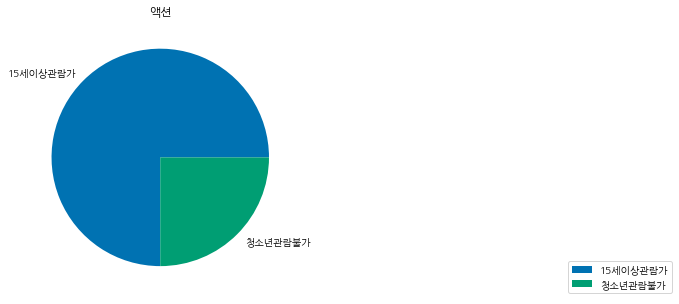

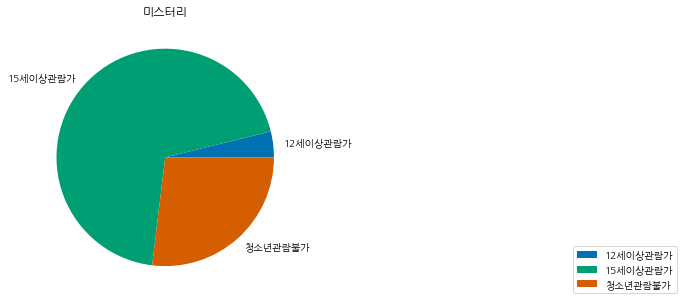

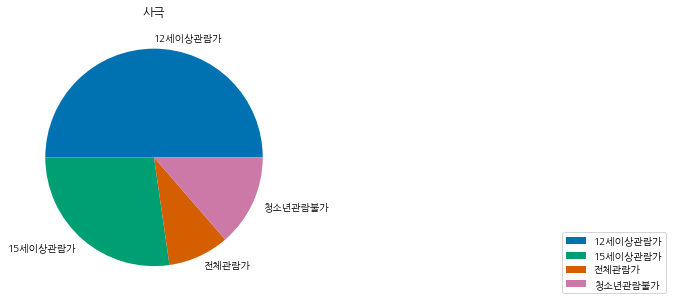

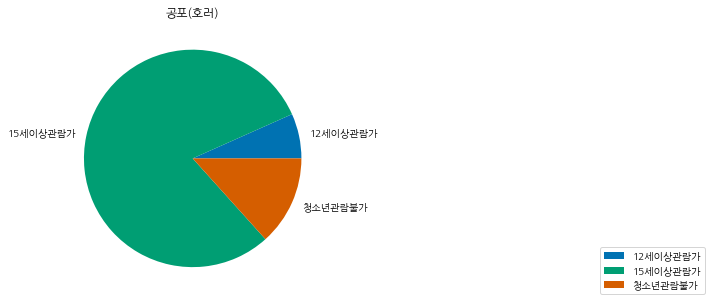

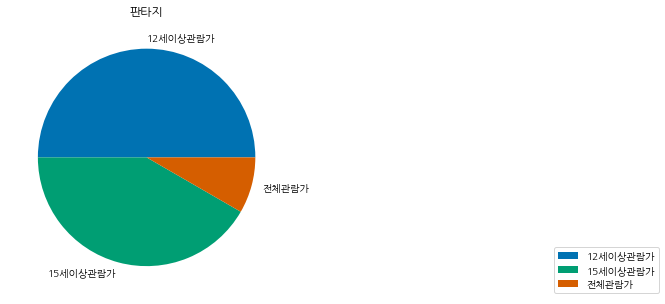

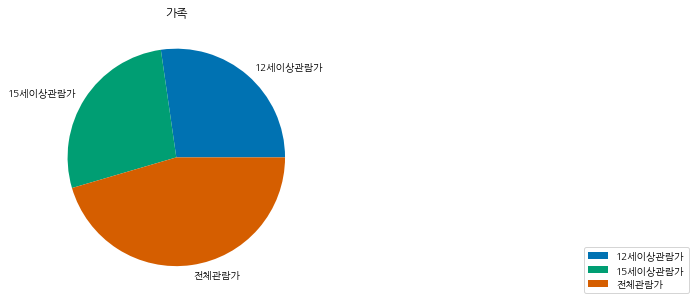

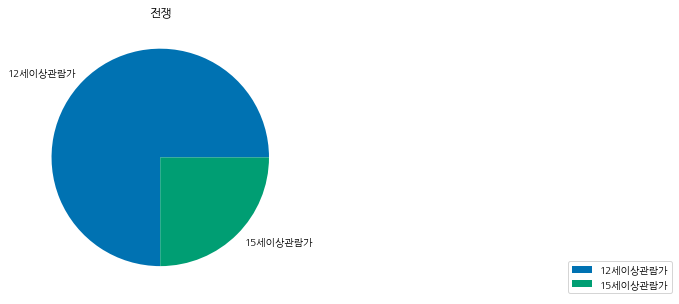

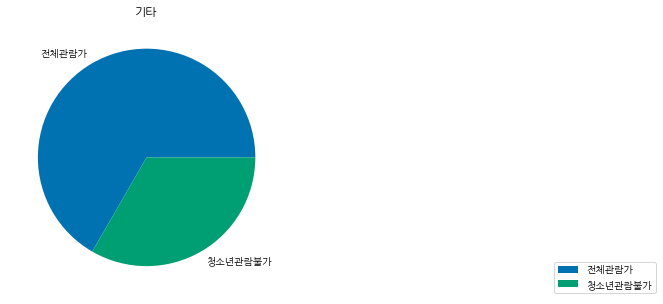

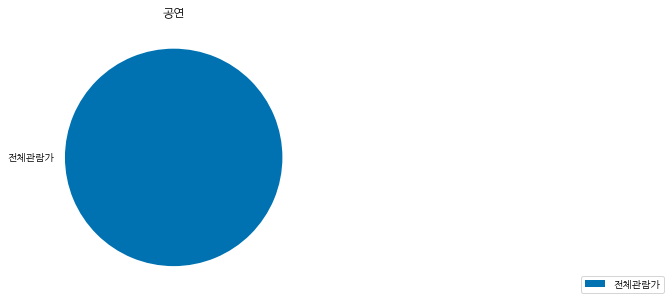

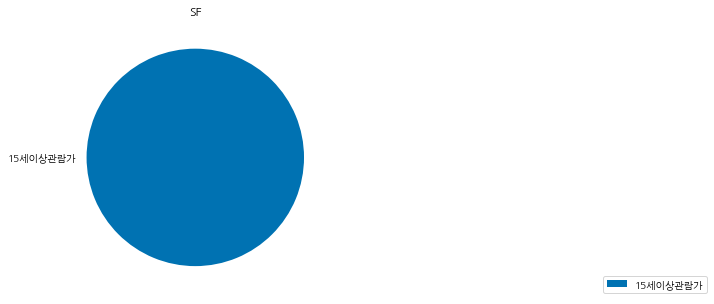

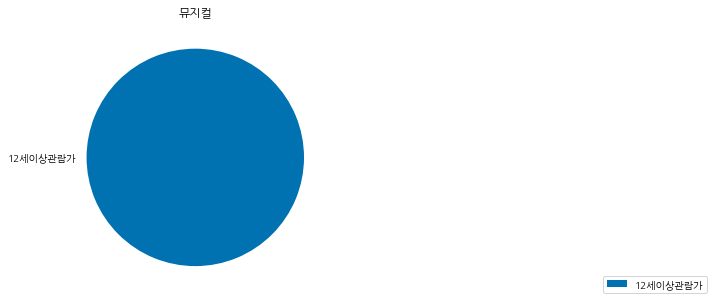

In [374]:
# 장르별 등급 파이차트
data = df.groupby(['대표장르', '등급'])['영화코드'].size().reset_index()
# data = data.sort_values('영화코드', ascending=False)
# data[data['대표장르'] == genre]['등급'] == '12세이상관람가'
for genre in df['대표장르'].unique():
    for grade in df['등급'].unique():
        if grade in data[data['대표장르'] == genre]['등급']:
            pass
        else: data = data.append({'대표장르':genre, '등급':grade, '영화코드':0}, ignore_index=True)

genre_order = df.groupby(['대표장르'])['영화코드'].size().reset_index()
genre_order = genre_order.sort_values('영화코드', ascending=False)

for genre in genre_order['대표장르']:
    ax = data[data['대표장르'] == genre].set_index('등급').plot.pie('영화코드')
    ax.set_ylabel('')
    plt.legend(loc=[2, 0])
    plt.title(genre)
    plt.show()

### 다큐멘터리를 제외한 배우성별-F-rated 관계 다시 보기
전체관람가-다큐멘터리에서 여성배우 성비가 높다

다큐멘터리에서 배우는 직업인이 아닌 경우가 대부분이므로, 다큐멘터리 장르를 제외하고 보기로 함

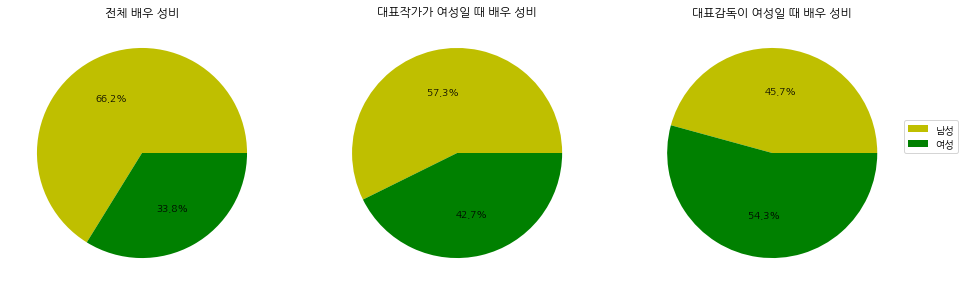

In [70]:
# 배우 성비 
data = df[df['대표장르'] != '다큐멘터리'].groupby('배우성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'배우 수'})

# 파이차트
plt.figure(figsize=[16, 6])
plt.subplot(1, 3, 1)
ax = data['배우 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('전체 배우 성비')

# 여성 대표작가일 때 배우 성비
data = df[df['작가성별'] == '여자'].groupby('배우성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'배우 수'})

# 파이차트
plt.subplot(1, 3, 2)
ax = data['배우 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('대표작가가 여성일 때 배우 성비')

# 여성 대표감독일 때 배우 성비
data = df[df['감독성별'] == '여자'].groupby('배우성별')['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'배우 수'})

# 파이차트
plt.subplot(1, 3, 3)
ax = data['배우 수'].plot.pie(autopct='%.1f%%', colors=['y', 'g'], labels=None)
ax.set_ylabel('')
plt.title('대표감독이 여성일 때 배우 성비')
plt.legend(['남성', '여성'], loc=[1, 0.5])
plt.show()

다큐멘터리 포함과 큰 차이 없음 1% 미만

다큐멘터리의 주연배우 성비가 거의 50 % 인듯

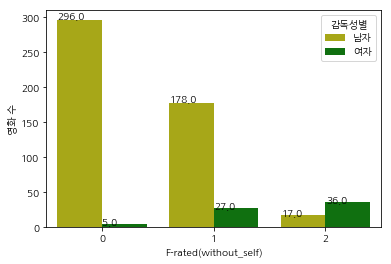

In [76]:
# 대표감독 성별에 따른 여성 (작가, 배우) 기용 수 - 다큐멘터리 제외
data = df[df['대표장르'] != '다큐멘터리'].groupby(['감독성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# F-rated(without_self) 컬럼 추가
data['F-rated(without_self)'] = data['F-rated']
data.loc[data['감독성별'] == '여자', 'F-rated(without_self)'] = data['F-rated'] - 1
# 주연배우성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated(without_self)', y='영화 수',hue='감독성별', data=data, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

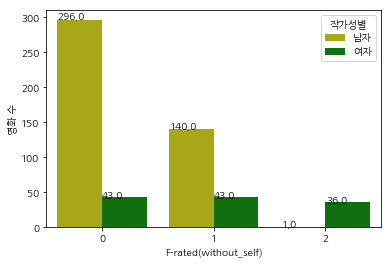

In [77]:
# 대표작가 성별에 따른 여성 (감독, 배우) 기용 수 - 다큐멘터리 제외
data = df[df['대표장르'] != '다큐멘터리'].groupby(['작가성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# F-rated(without_self) 컬럼 추가
data['F-rated(without_self)'] = data['F-rated']
data.loc[data['작가성별'] == '여자', 'F-rated(without_self)'] = data['F-rated'] - 1
# 주연배우성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated(without_self)', y='영화 수',hue='작가성별', data=data, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

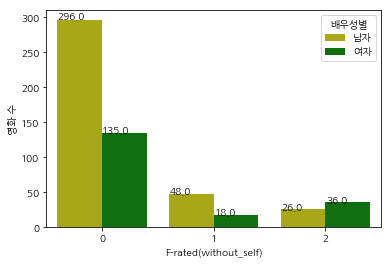

In [79]:
# 주연배우 성별에 따른 여성 (감독, 작가) 기용 수 - 다큐멘터리 제외
data = df[df['대표장르'] != '다큐멘터리'].groupby(['배우성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# F-rated(without_self) 컬럼 추가
data['F-rated(without_self)'] = data['F-rated']
data.loc[data['배우성별'] == '여자', 'F-rated(without_self)'] = data['F-rated'] - 1
# 주연배우성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated(without_self)', y='영화 수',hue='배우성별', data=data, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

### 애니메이션-배우가 대부분 성우 아닐까

In [ ]:
df[df['대표장르'] == '애니메이션'][['주연배우','배우_대표역할', '배우필모']]

# 연도별 - F-rating

In [68]:
df['datetime'] = pd.to_datetime(df['개봉일'])
df['year'] = pd.to_datetime(df['개봉일']).dt.year
df['month'] = pd.to_datetime(df['개봉일']).dt.month
df['day'] = pd.to_datetime(df['개봉일']).dt.day
df['weekday'] = pd.to_datetime(df['개봉일']).dt.dayofweek
df['weekday_name'] = pd.to_datetime(df['개봉일']).dt.weekday_name
df['year-month'] = df['개봉일'].apply(lambda x: x[:7])
# df = df.drop('dayofweek', axis=1)
# df = df.rename(columns={'weekday':'weekday_name'})
print(df.shape)
df.sample()

(686, 45)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,datetime,year,month,day,weekday,weekday_name,year-month
316,시간위의 집,20161923,2017-04-05,한국,한국,"미스터리,스릴러",15세이상관람가,장편,일반영화,"리드미컬그린(주),자이온 이엔티(주),브릿지웍스 엔터테인먼트(주),라이브(주)","(주)리틀빅픽쳐스,(주)페퍼민트앤컴퍼니",10971,454,987958600.000000,124601,247386600,29576,1,임대웅,임대웅,10058504,남자,감독,시간위의 집|실종 : 택시 납치 사건|스승의 은혜|일단뛰어|비수기|무서운 이야기|무...,장재현,장재현,장재현,10060462,남자,감독,"사바하|시간위의 집|검은 사제들|광해, 왕이 된 남자|특수본|바다|12번째 보조사제...","김윤진,옥택연,조재윤,이한위,박준면,백도빈,유인영,서민수,정용욱,이동규,이재우,고우...",김윤진,마리안느 스퇴거,10005297,여자,배우,자백|담보|시간위의 집|국제시장|이웃사람|심장이 뛴다|하모니|농민가|세븐 데이즈|6...,2017-04-05,2017,4,5,2,Wednesday,2017-04


### 연도별 - F 등급별 영화수 추이

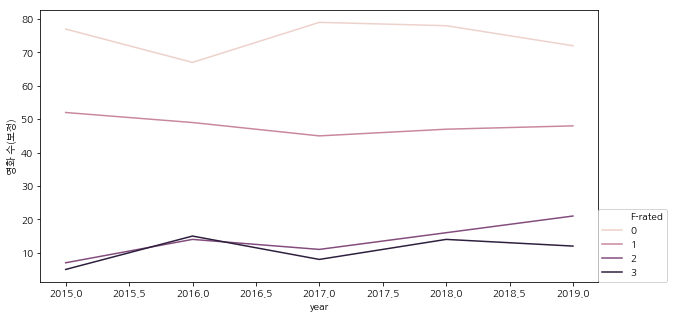

In [249]:
# 연도별 F-rated 등급 비율의 변화
data = df.groupby(['year', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

sns.lineplot(hue='F-rated', y='영화 수(보정)', x='year', data=data)
plt.legend(loc=[1,0])

# sns.barplot(hue='F-rated', y='영화 수(보정)', x='year', data=data)

(2019년 데이터는 8월까지 데이터를 이용해 보정값으로 계산)

F-rated 0, F-rated 1 등급은 줄어드는 중

F-rated 지수 2, 3 등급은 미미하지만 늘어나는 중

    → 전체적으로 서서히 F-rated 등급이 높아지고 있다고 볼 수 있음

### 월별 - F 등급별 영화 수 추이

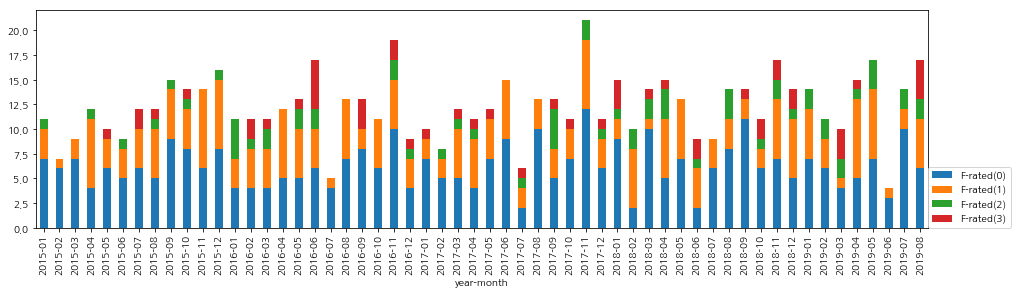

In [81]:
data = df.groupby(['year-month'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

year_f_rated = df.groupby(['year-month', 'F-rated'])['영화코드'].size()
for year_month in df['year-month'].unique():
    for i in range(4):
        if i in list(year_f_rated[year_month].index):
            data.loc[data['year-month'] == year_month, f'F-rated({i})'] = year_f_rated[year_month][i]
        else: data.loc[data['year-month'] == year_month, f'F-rated({i})'] = 0

# stack bar plot
data.set_index('year-month').drop('영화 수', axis=1).plot(kind='bar', stacked=True, figsize=(16, 4))
plt.legend(loc=[1, 0])
plt.show()

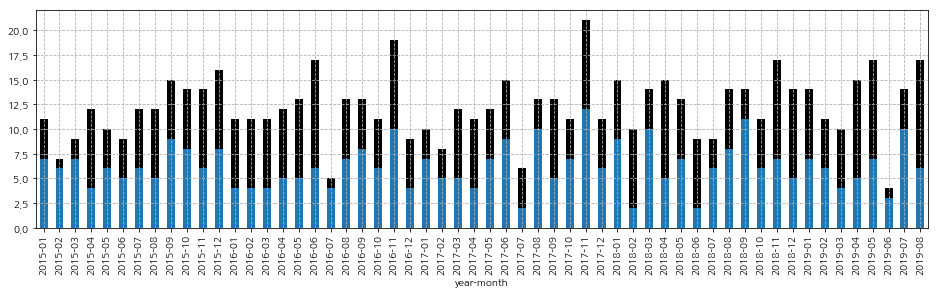

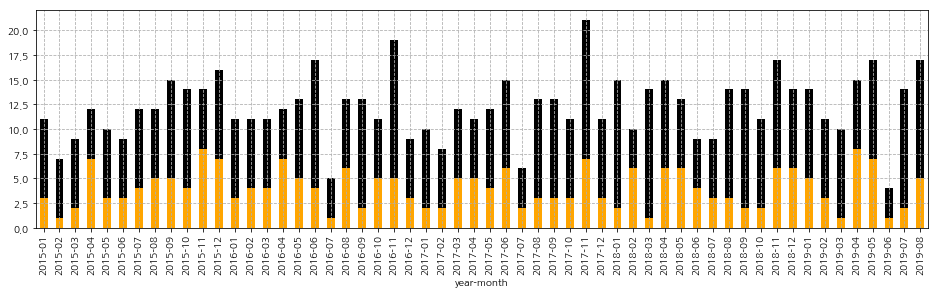

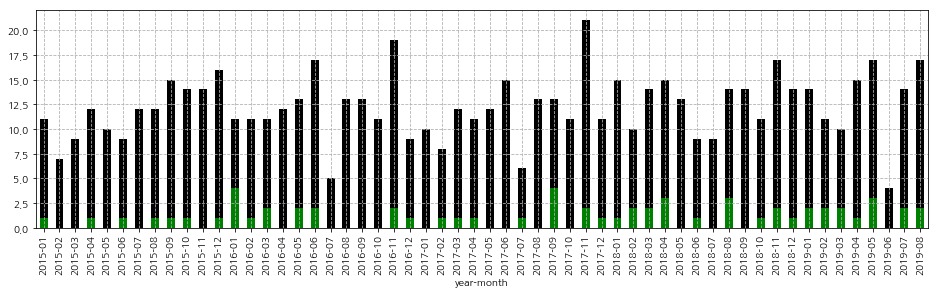

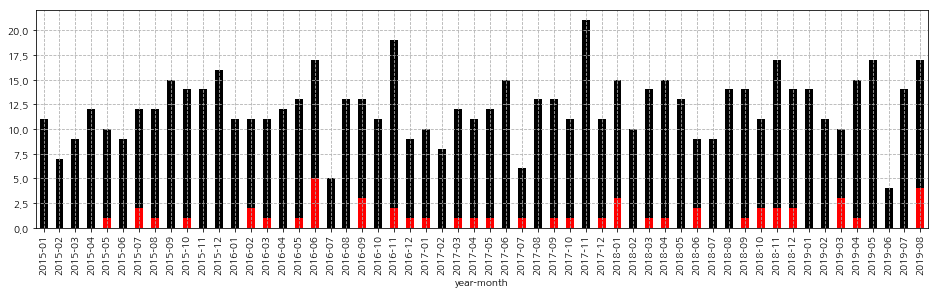

In [82]:
data.set_index('year-month')['영화 수'].plot(kind='bar', figsize=(16, 4), colors='#000000')
data.set_index('year-month')['F-rated(0)'].plot(kind='bar', figsize=(16, 4))
plt.grid(linestyle='--')
plt.show()

data.set_index('year-month')['영화 수'].plot(kind='bar', figsize=(16, 4), colors='#000000')
data.set_index('year-month')['F-rated(1)'].plot(kind='bar', figsize=(16, 4), colors='orange')
plt.grid(linestyle='--')
plt.show()

data.set_index('year-month')['영화 수'].plot(kind='bar', figsize=(16, 4), colors='#000000')
data.set_index('year-month')['F-rated(2)'].plot(kind='bar', figsize=(16, 4), colors='green')
plt.grid(linestyle='--')
plt.show()

data.set_index('year-month')['영화 수'].plot(kind='bar', figsize=(16, 4), colors='#000000')
data.set_index('year-month')['F-rated(3)'].plot(kind='bar', figsize=(16, 4), colors='red')
plt.grid(linestyle='--')
plt.show()

매년 6-7월 개봉작 수가 현저히 낮다 -> 휴가철을 의식해서 일부러 개봉 안하는 것?

매년 11-12월이 개봉작 가장 많다

3-F 영화 개봉 많이한 시기 2016-06, 2016-09, 2018-01, 2019-04, 2019-08

### 월별 - 각 역할 성비 추이

In [260]:
data[:1].append({'year-month':year_month, '감독성별':sex, '영화 수':0}, ignore_index=True)

,year-month,감독성별,영화 수
0,2015-01,남자,10
1,2019-08,남자,0


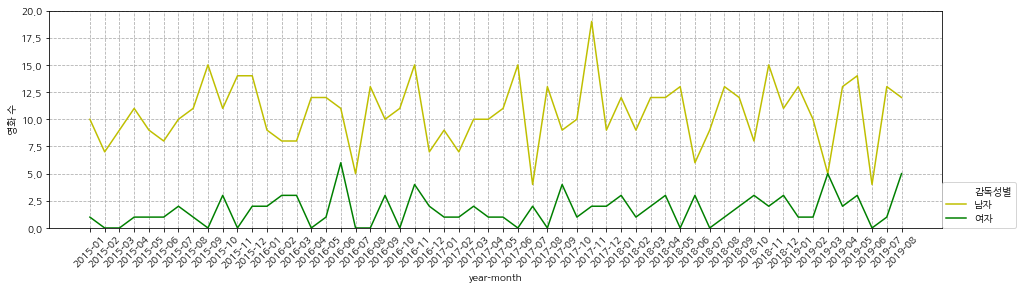

In [262]:
### 연도-월별 대표감독 성비 변화 추이
data = df.groupby(['year-month', '감독성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

for year_month in data['year-month'].unique():
    for sex in ['여자', '남자']:
        if sex in list(data[data['year-month'] == year_month]['감독성별']):
            pass
        else: data = data.append({'year-month':year_month, '감독성별':sex, '영화 수':0}, ignore_index=True)

plt.figure(figsize=[16, 4])
sns.lineplot(x='year-month', y='영화 수', hue='감독성별', data=data, palette=['y', 'g'])
plt.legend(loc=[1,0])
plt.xticks(rotation=45)
plt.grid(linestyle='--')
plt.ylim(0, 20)
plt.show()

대표감독, 대표작가, 주연배우 중 성비가 가장 크게 차이나는 것은 대표감독 

    여성 1: 남성 6
    
여성 대표감독 수는 느리지만 꾸준히 늘고있는 것으로 보인다

    2016년에 2배가량 증가 이후 2017년 감소
    
2017-10 남성감독 영화 수 최고치

2019-02 유일하게 여성감독, 남성감독 영화 수 같음

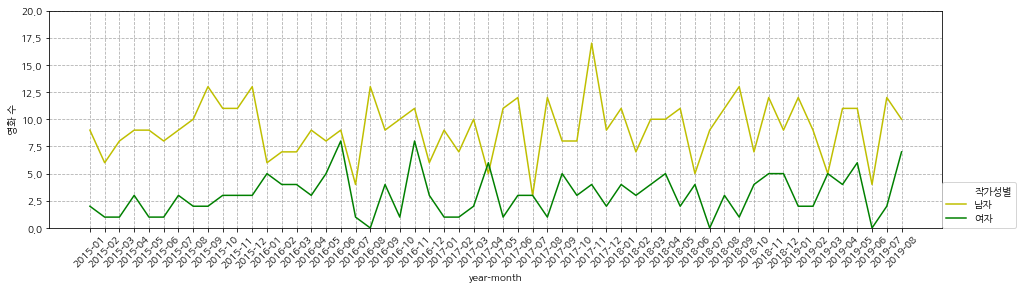

In [263]:
### 연도-월별 대표작가 성비 변화 추이
data = df.groupby(['year-month', '작가성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

for year_month in data['year-month'].unique():
    for sex in ['여자', '남자']:
        if sex in list(data[data['year-month'] == year_month]['작가성별']):
            pass
        else: data = data.append({'year-month':year_month, '작가성별':sex, '영화 수':0}, ignore_index=True)

plt.figure(figsize=[16, 4])
sns.lineplot(x='year-month', y='영화 수', hue='작가성별', data=data, palette=['y', 'g'])
plt.legend(loc=[1,0])
plt.xticks(rotation=45)
plt.grid(linestyle='--')
plt.ylim(0, 20)
plt.show()

2016년에 F-rated 변동이 컸던 것은 대표작가 때문인 것으로 확인

    → 여성 대표작가 수가 2016년에 가장 늘어남 2배 가량

이후 2017년 다시 2015년 수준으로 감소했지만 다시 늘고 있음

2017-10 남성작가 영화 수 최고치 (감독과 마찬가지)

2017-03, 2017-06, 2019-02 여성작가수가 남성작가수 이상

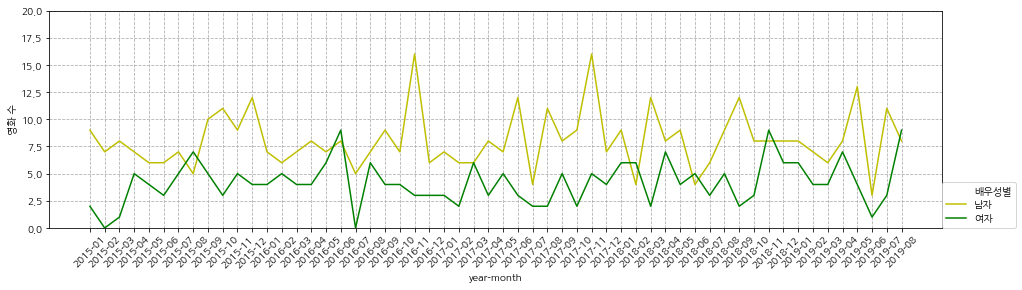

In [264]:
### 연도-월별 주연배우 성비 변화 추이
data = df.groupby(['year-month', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

for year_month in data['year-month'].unique():
    for sex in ['여자', '남자']:
        if sex in list(data[data['year-month'] == year_month]['배우성별']):
            pass
        else: data = data.append({'year-month':year_month, '배우성별':sex, '영화 수':0}, ignore_index=True)

plt.figure(figsize=[16, 4])
sns.lineplot(x='year-month', y='영화 수', hue='배우성별', data=data, palette=['y', 'g'])
plt.legend(loc=[1,0])
plt.xticks(rotation=45)
plt.grid(linestyle='--')
plt.ylim(0, 20)
plt.show()

대표감독, 대표작가, 주연배우 중에서 주연배우가 여성 비율이 가장 큼
    
    여성 1: 남성2
    
2016년에 여성주연 늘어났다가 2017년에 줄어듬

    2018년에 다시 2016년 수준으로 늘어남

남성주연 수에 큰 변화 없음
    
    아주 미미하게 줄어드는 것으로 보임
    
2015-01, 2016-06 여성주연 영화 없음

#### 합쳐서 생각해보기
매년 6-7월에 개봉 영화 수가 급격히 주는데, 그 때 큰 타격은 여성영화인에게 옴

In [ ]:
# 전체적으로 난리난 2016 년에 무슨 영화가 개봉했는지 확인

# 3-F 영화 개봉 많이한 시기 2016-06, 2016-09, 2018-01, 2019-04, 2019-08

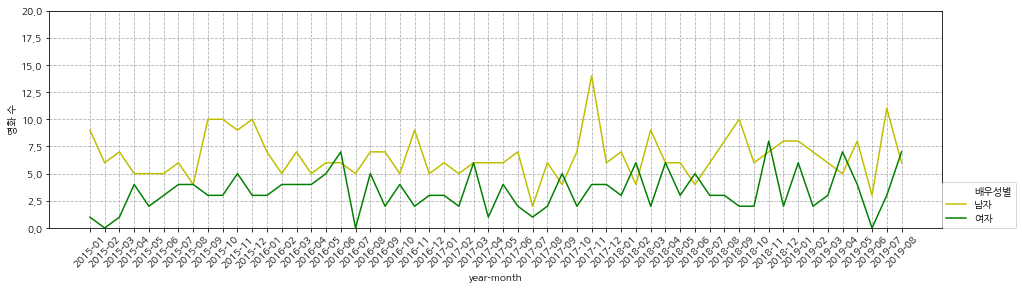

In [265]:
### 연도-월별 주연배우 성비 변화 추이
data = df[df['대표장르'] != '다큐멘터리'].groupby(['year-month', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

for year_month in data['year-month'].unique():
    for sex in ['여자', '남자']:
        if sex in list(data[data['year-month'] == year_month]['배우성별']):
            pass
        else: data = data.append({'year-month':year_month, '배우성별':sex, '영화 수':0}, ignore_index=True)

plt.figure(figsize=[16, 4])
sns.lineplot(x='year-month', y='영화 수', hue='배우성별', data=data, palette=['y', 'g'])
plt.legend(loc=[1,0])
plt.xticks(rotation=45)
plt.grid(linestyle='--')
plt.ylim(0, 20)
plt.show()

#### 다큐멘터리 제외한 결과

여성 주연 늘고 있다
    
    2016년에 여성주연 늘어났다가 2017년에 줄어듬

남성주연 수에 큰 변화 없음
    
    2016년에 잠깐 떨어졌다가 회복

## 상영횟수등급 - F-rating

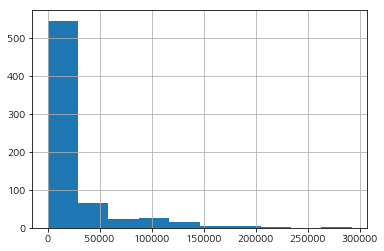

In [87]:
# 상영횟수등급(가칭)에 따른 F-rated 등급 비율의 변화
df['상영횟수'].hist()

특정영화들만 상영횟수가 엄청나게 뛴다

### 상영횟수등급 나누기
등급별 영화 갯수가 같도록(약 43개) 16등급으로 나눔

In [89]:
df['상영횟수등급'] = 16
df.loc[df['상영횟수'] < 95_833.25, '상영횟수등급'] = 15
df.loc[df['상영횟수'] < 53_328, '상영횟수등급'] = 14
df.loc[df['상영횟수'] < 38_521.25, '상영횟수등급'] = 13
df.loc[df['상영횟수'] < 20_220.25, '상영횟수등급'] = 12
df.loc[df['상영횟수'] < 12_585, '상영횟수등급'] = 11
df.loc[df['상영횟수'] < 6_668, '상영횟수등급'] = 10
df.loc[df['상영횟수'] < 4_471, '상영횟수등급'] = 9
df.loc[df['상영횟수'] < 2_330, '상영횟수등급'] = 8
df.loc[df['상영횟수'] < 1_405.75, '상영횟수등급'] = 7
df.loc[df['상영횟수'] < 840.5, '상영횟수등급'] = 6
df.loc[df['상영횟수'] < 592.75, '상영횟수등급'] = 5
df.loc[df['상영횟수'] < 422, '상영횟수등급'] = 4
df.loc[df['상영횟수'] < 325, '상영횟수등급'] = 3
df.loc[df['상영횟수'] < 219, '상영횟수등급'] = 2
df.loc[df['상영횟수'] < 137, '상영횟수등급'] = 1

df[['상영횟수', '상영횟수등급']].sample()

,상영횟수,상영횟수등급
105,2562,9


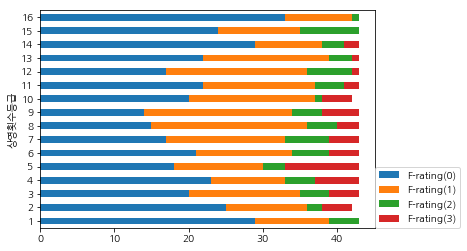

In [91]:
data = df.groupby(['상영횟수등급'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

audi_f_rated = df.groupby(['상영횟수등급', 'F-rated'])['영화코드'].size()

for audi in df['상영횟수등급'].unique():
    for i in range(4):
        if i in list(audi_f_rated[audi].index):
            data.loc[data['상영횟수등급'] == audi, f'F-rating({i})'] = audi_f_rated[audi][i]
        else: data.loc[data['상영횟수등급'] == audi, f'F-rating({i})'] = 0
       
    # stack bar plot
data.set_index('상영횟수등급').drop('영화 수', axis=1).plot(kind='barh', stacked=True)
plt.legend(loc=[1, 0])
# y-scale 상영횟수로 바꾸기

0-F 등급 영화는 상영횟수등급 9 에서 가장 적다 

    상영횟수가 많을수록, 적을수록 양쪽 모두 0-F 등급 영화 수는 증가한다
    
    흥행에 성공하는 영화일수록, 흥행이 안되는 영화일수록 여성이 main role 을 하지 못한다
    → 유리천장, 유리바닥
    
1-F 등급 영화는 F-rated 0 을 뒤집어 놓은 그래프 모양

2-F 등급 영화는 상영횟수등급 전체에 골고루 분포해있다 
    
    상영횟수등급 15 에서 갑자기 많음 - 뭘까? 대중에게 일정 이상 노출되는 여성영화는 흥행하는 건가

3-F 등급 영화는 낮은 상영횟수등급에서 더 많다
    
    상영횟수등급 15~16 최고흥행, 1~2 최저흥행 영화 중에는 아예 없다
    → 0-F 등급과 마찬가지로 유리천장, 유리바닥이 생각나는 대목

#### 대중에게 일정 이상 노출되는 여성영화는 무조건 흥행?
주연이 여성이 아닌 영화들이 있음. 이런 영화들은 여성영화로 인식되지 않는다

여성영화라서 대중의 지지로 흥행한 것은 아님, 그냥 여성 영화인들의 역량이 뛰어났다고 해석?

In [ ]:
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 16)][['영화명', '감독', '배우', '장르']]
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 15)][['영화명', '감독', '배우', '장르']]

In [ ]:
# 재민

## F-rating 별 매출액 비교

### 1. 전국매출액 단순 비교
* F등급 0인 영화의 분포는 분산이 매우 크다. 
    * 특히 2019년 개봉작 '극한직업'의 상영횟수와 매출액은 눈에 띄는 아웃라이어: 이전 해에도 이런 천만영화는 있긴 했을텐데 얘가 유난히 큰 걸 보면 몰아주기 현상이 최근으로 올 수록 점점 더 심해지는 것 아닐까?
    * 극한직업은 현재 매출액 2위
    * 극한직업의 전국관객수 = 95UBD (1위 명량 = 100UBD)
* 최대값 비교: 0-F가 3-F의 15.72배
* 평균값 비교: 0-F가 3-F의 13.45배
* 중간값 비교: 0-F가 3-F의 7.03배

In [119]:
sales_des = df.groupby('F-rated')['전국매출액'].describe()
sales_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,8443828671.498568,19296622914.554569,2237000.000000,19563000.000000,284650500.000000,6440492657.000000,139647979516.000000
1,225.000000,4416241416.057777,12245289357.006899,3389900.000000,37782300.000000,233916700.000000,2671391900.000000,98463132781.000000
2,62.000000,3659068263.209677,6641032538.450189,4166700.000000,25002862.500000,192326780.000000,3541716761.000000,28869614062.000000
3,50.000000,627730950.460000,1738309404.087977,6701500.000000,17332850.000000,40494700.000000,317282407.500000,8881616256.000000


In [120]:
# 최대값 비교: 0-F가 3-F의 15.72배
sales_des.iloc[0,-1] / sales_des.iloc[3,-1]

# 평균값 비교: 0-F가 3-F의 13.45배
sales_des.iloc[0,1] / sales_des.iloc[3,1]

# 중간값 비교: 0-F가 3-F의 7.03배
sales_des.iloc[0,-3] / sales_des.iloc[3,-3]

7.029327294683008

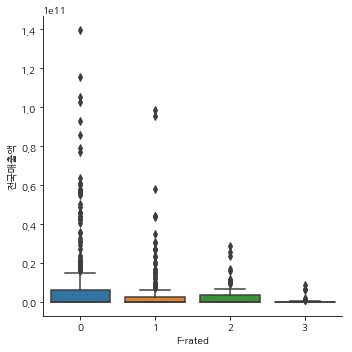

In [140]:
ax = sns.catplot(x='F-rated', y='전국매출액', data=df
#                   , hue='상영횟수등급'
            , kind='box'
           )
# ax.fig.set_size_inches(16, 6)

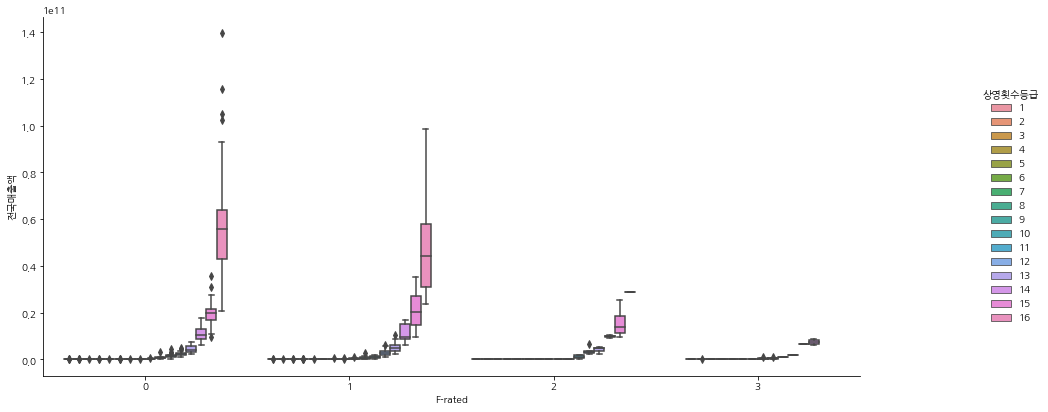

In [153]:
ax = sns.catplot(x='F-rated', y='전국매출액', data=df
                  , hue='상영횟수등급'
            , kind='box'
           )
ax.fig.set_size_inches(16, 6)

In [ ]:
# 엄청난 아웃라이어가 있어서 확인해봤더니 극한직업
df[df['전국매출액']==139647979516]

In [ ]:
# 극한직업 UBD
16264944 / 170000

### 2. 상영횟수 비교
* 최대값 비교: 0-F가 3-F의 6.97배
* 평균값 비교: 0-F가 3-F의 6.4배
* 중간값 비교: 0-F가 3-F의 5.22배

In [93]:
show_des = df.groupby('F-rated')['상영횟수'].describe()
show_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,25572.765043,44192.492902,41.000000,393.000000,3189.000000,32618.000000,292578.000000
1,225.000000,15901.488889,30435.793473,45.000000,572.000000,2560.000000,17414.000000,184198.000000
2,62.000000,17167.532258,27534.009084,96.000000,516.500000,1885.000000,19525.750000,120808.000000
3,50.000000,3997.580000,8921.958084,140.000000,409.500000,610.500000,3188.000000,41970.000000


In [94]:
# 최대값 비교: 0-F가 3-F의 6.97배
show_des.iloc[0,-1] / show_des.iloc[3,-1]

# 평균값 비교: 0-F가 3-F의 6.4배
show_des.iloc[0,1] / show_des.iloc[3,1]

# 중간값 비교: 0-F가 3-F의 5.22배
show_des.iloc[0,-3] / show_des.iloc[3,-3]

5.223587223587224

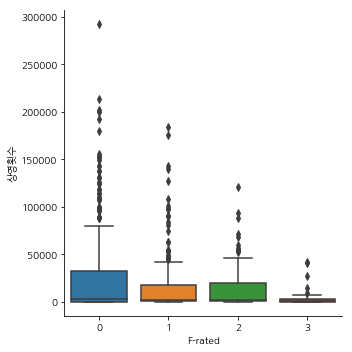

In [142]:
ax = sns.catplot(x='F-rated', y='상영횟수', data=df
            , kind='box'
#                   , hue='상영횟수등급'
           )
# ax.fig.set_size_inches(16, 6)

### 3. 스크린수 (개봉 첫 주 최대 스크린수) 비교
* 최대값 비교: 0-F가 3-F의 2.83배
* 평균값 비교: 0-F가 3-F의 3.41배
* 중간값 비교: 0-F가 3-F의 6.76배

In [96]:
screen_des = df.groupby('F-rated')['전국스크린수'].describe()
screen_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,425.765043,481.700767,1.000000,25.000000,223.000000,763.000000,2235.000000
1,225.000000,332.248889,366.404880,1.000000,41.000000,190.000000,536.000000,1906.000000
2,62.000000,348.725806,385.979281,3.000000,24.000000,118.500000,588.000000,1431.000000
3,50.000000,124.940000,190.798046,9.000000,18.000000,33.000000,135.250000,790.000000


In [97]:
# 최대값 비교: 0-F가 3-F의 2.83배
screen_des.iloc[0,-1] / screen_des.iloc[3,-1]

# 평균값 비교: 0-F가 3-F의 3.41배
screen_des.iloc[0,1] / screen_des.iloc[3,1]

# 중간값 비교: 0-F가 3-F의 6.76배
screen_des.iloc[0,-3] / screen_des.iloc[3,-3]

6.757575757575758

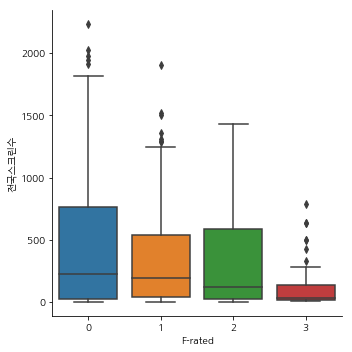

In [145]:
ax = sns.catplot(x='F-rated', y='전국스크린수', data=df
            , kind='box'
#                   , hue='상영횟수등급'
           )
# ax.fig.set_size_inches(16, 6)

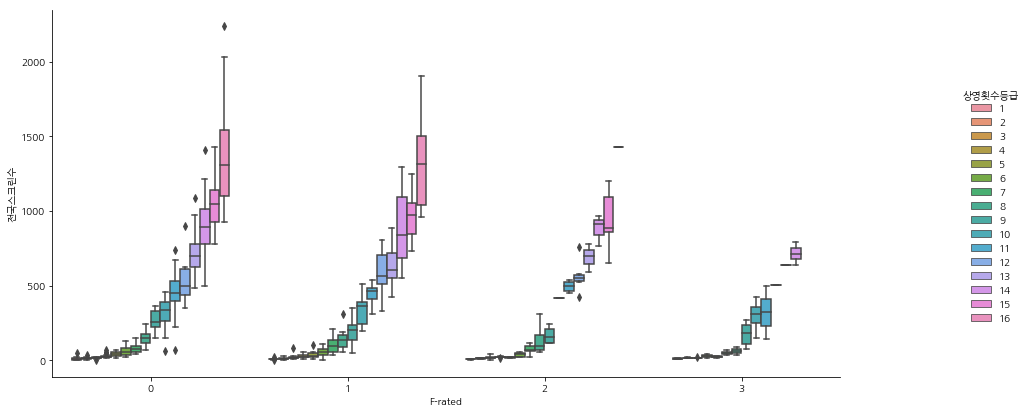

In [151]:
ax = sns.catplot(x='F-rated', y='전국스크린수', data=df
            , kind='box'
                  , hue='상영횟수등급'
           )
ax.fig.set_size_inches(16, 6)

### 4. 상영횟수 대비 매출액 (회당 평균 매출액) 비교 
* 최대값 비교: 0-F가 3-F의 2.92배
* 평균값 비교: 0-F가 3-F의 1.93배
* 중간값 비교: 0-F가 3-F의 1.68배
* 매출액을 단순비교했을 때는 최대값이 15.72배, 평균값이 13.45배, 중간값이 7.03배였는데 차이가 아주 많이 작아짐 -> 여성영화가 상영기회가 적은 것에 비해 좋은 결과를 내고 있음

In [99]:
df['회당 평균 매출액'] = df['전국매출액'] / df['상영횟수']

sales_avg_des = df.groupby('F-rated')['회당 평균 매출액'].describe()
sales_avg_des

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,155540.729377,130550.907331,16898.285714,53692.105263,111269.702842,226292.536063,707758.081588
1,225.000000,134106.185869,107799.196562,12607.660455,53483.918813,95928.555121,179533.700787,566693.232923
2,62.000000,127020.998213,86527.101199,20012.500000,50720.432237,118052.061786,176729.343906,404414.606255
3,50.000000,80636.964443,53594.890722,16052.380952,41535.657832,66291.389137,100268.054881,242314.261272


In [100]:
# 최대값 비교: 0-F가 3-F의 2.92배
sales_avg_des.iloc[0,-1] / sales_avg_des.iloc[3,-1]

# 평균값 비교: 0-F가 3-F의 1.93배
sales_avg_des.iloc[0,1] / sales_avg_des.iloc[3,1]

# 중간값 비교: 0-F가 3-F의 1.68배
sales_avg_des.iloc[0,-3] / sales_avg_des.iloc[3,-3]

1.6784940592051072

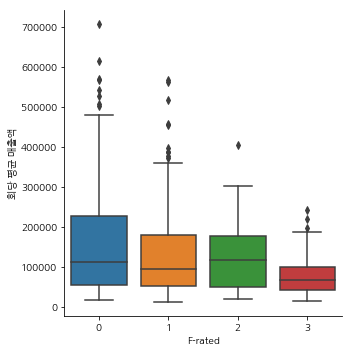

In [150]:
ax = sns.catplot(x='F-rated', y='회당 평균 매출액', data=df
            , kind='box'
                )

스크린마다 수용가능 관객수가 다르고 특정 영화만 대형관에 상영되는 것, 프라임 시간대에 배정되는 것이 중요한 feature 될 수 있음  
-> 각 영화가 어떤 스크린에서 상영했는지에 대한 데이터, 스크린별 수용인원 데이터, 상영시간표 데이터 추가로 필요

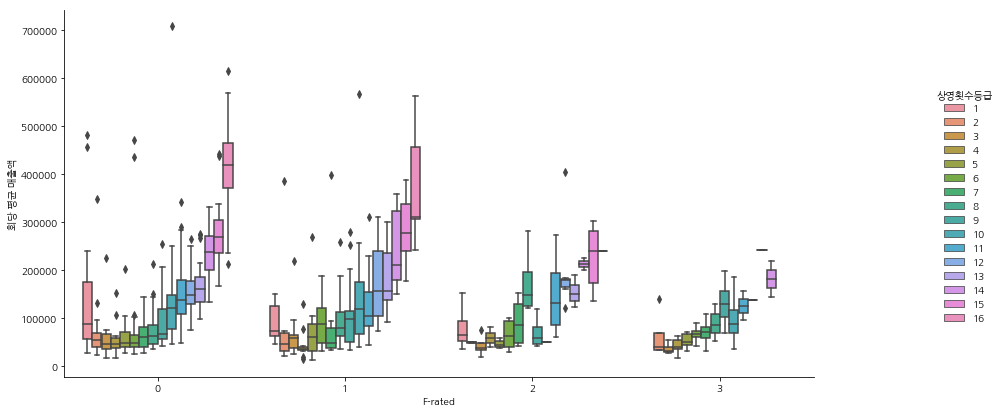

In [146]:
ax = sns.catplot(x='F-rated', y='회당 평균 매출액', data=df
            , kind='box'
                  , hue='상영횟수등급'
           )
ax.fig.set_size_inches(16, 6)

#### 회당 매출액과 상영횟수의 관계

상영횟수와 매출액의 관계를 보았을 때는, 상영횟수가 늘어날수록 매출액이 증가하는 비례관계였는데

상영횟수와 회당 매출액의 관계를 보니, 상영횟수가 적어도 회당 매출액이 높은 구간이 발견됨. 
    
    1. F 등급이 높아질수록 
    2. 상영횟수가 적을수록 (상영횟수등급 1 ~ 4)
    이같은 현상이 두드러진다
    
    따라서
    
    상영횟수가 많을수록 영화제작(배급, 투자)과정에서 높은 가치로 예측된 영화이고
    회당 매출액이 높은 영화일수록 실제 시장가치가 높다고 볼 때, 
    
    → 1. F-등급이 높아질수록(여성 참여율이 높아질수록) 
    2. 상영횟수가 적은 영화일수록(저예산? 작은 배급사? 개봉초에 스크린을 적게 할당받은 경우?)
    영화의 가치를 제대로 평가받지 못하고 있다고 해석할 수 있다. 

### 5. 스크린수 대비 매출액 (스크린당 평균 매출액) 비교 
* 최대값 비교: 0-F가 3-F의 8.78배
* 평균값 비교: 0-F가 3-F의 3.67배
* 중간값 비교: 0-F가 3-F의 1.31배
* 매출액을 단순비교했을 때는 최대값이 15.72배, 평균값이 13.45배, 중간값이 7.03배였는데 차이가 아주 많이 작아짐 -> 여성영화가 상영기회가 적은 것(적은 스크린을 배당받고 있는 것)에 비해 좋은 결과를 내고 있음

In [103]:
df['스크린당 평균 매출액'] = df['전국매출액'] / df['전국스크린수']

sales_avg_des2 = df.groupby('F-rated')['스크린당 평균 매출액'].describe()
sales_avg_des2

,count,mean,std,min,25%,50%,75%,max
F-rated,,,,,,,,
0,349.000000,8173501.787248,13607153.328351,165650.000000,738703.921569,1822680.000000,9425564.078363,98707706.766917
1,225.000000,5544535.147880,9272414.636843,171095.121951,724685.321101,1822815.804598,5779303.054187,64821022.238973
2,62.000000,5021844.480149,6139341.381359,409959.803922,876995.790960,1506687.215370,7208715.099360,24927032.609568
3,50.000000,2225764.882455,2487232.162176,364889.583333,770374.621212,1386302.777778,2175343.452381,11242552.222785


In [104]:
# 최대값 비교: 0-F가 3-F의 8.78배
sales_avg_des2.iloc[0,-1] / sales_avg_des2.iloc[3,-1]

# 평균값 비교: 0-F가 3-F의 3.67배
sales_avg_des2.iloc[0,1] / sales_avg_des2.iloc[3,1]

# 중간값 비교: 0-F가 3-F의 1.31배
sales_avg_des2.iloc[0,-3] / sales_avg_des2.iloc[3,-3]

1.3147777161073917

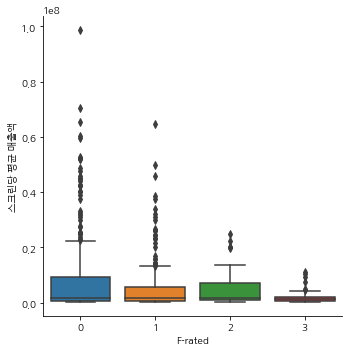

In [149]:
ax = sns.catplot(x='F-rated', y='스크린당 평균 매출액', data=df
            , kind='box'
                )

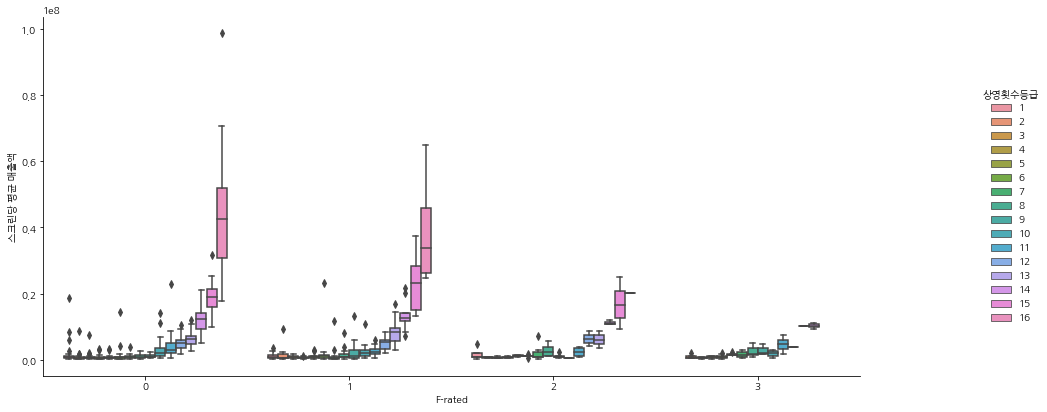

In [148]:
ax = sns.catplot(x='F-rated', y='스크린당 평균 매출액', data=df
            , kind='box'
                  , hue='상영횟수등급'
           )
ax.fig.set_size_inches(16, 6)

## 배급사별 F등급 영화 비율
배급사명 전처리 완료된 파일임  
: 롯데엔터테인먼트는 2018년 5월 31일까지는 롯데쇼핑 소속, 2018년 6월 1일 이후 롯데컬처웍스 소속으로 배급사 이름이 나눠져 있었으나 모두 '롯데컬처웍스(주)롯데엔터테인먼트'로 통일했음

### 1. 배급사별 총 상영횟수 현황
4대 배급사 'CJ E&M', '쇼박스', 'NEW', '롯데엔터테인먼트'는 투자까지도 하고 있는 '투자/배급사'로 한국영화산업에 매우 큰 영향력을 발휘한다.  
이들이 배급한 영화의 상영이 전체 영화 상영의 78%를 차지하고 있다.  

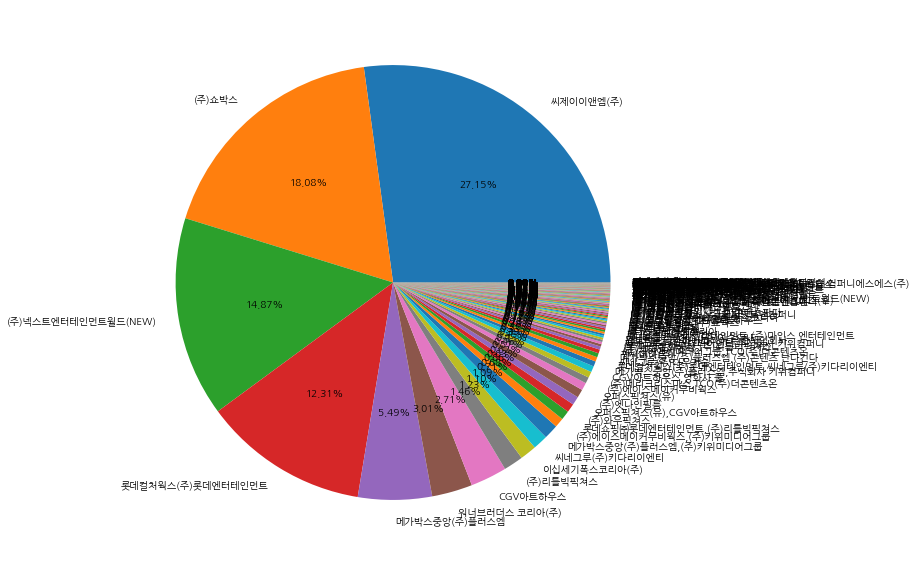

In [106]:
plt.rcParams["figure.figsize"] = (20,10)
df.groupby('배급사')['상영횟수'].sum().sort_values(ascending=False).plot(kind='pie', label='', autopct='%.2f%%')
# 4 대 배급사 외에는 '기타'로 표시

### 2. 총 상영횟수 기준 Top 10 배급사의 F등급 영화 배급 비율
대형배급사가 차지하는 파이가 이렇게 크므로 이들로부터 배급되는 것이 영화 흥행의 주요요인이 된다.  
이런 대형배급사들이 여성주도영화를 얼마나 배급하고 있는지 알아보자.

In [107]:
# 배급사별로 F등급별 영화 개수 구하기

f_counting = pd.DataFrame({'F-rated': [0, 1, 2, 3]})

for cp in df['배급사'].unique():
    dist = df[df['배급사'] == cp]
    by_dist = dist.groupby('F-rated')['영화명'].count().reset_index().rename(columns = {'영화명':cp})
    f_counting = f_counting.merge(by_dist, how='left', on='F-rated')

f_counting = f_counting.T.drop('F-rated', axis=0) 
print(f_counting.shape)
f_counting.head()

(190, 4)


,0,1,2,3
메가박스중앙(주)플러스엠,9.000000,9.000000,4.000000,1.000000
"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",1.000000,nan,nan,nan
씨제이이앤엠(주),30.000000,18.000000,3.000000,2.000000
(주)넥스트엔터테인먼트월드(NEW),31.000000,13.000000,4.000000,1.000000
(주)인디플러그,6.000000,7.000000,2.000000,3.000000


In [108]:
# 배급사별 전체 영화개수 구하기

f_counting = f_counting.fillna(0)
f_counting['영화개수'] = f_counting.sum(axis=1)

print(f_counting.shape)
f_counting.head()

(190, 5)


,0,1,2,3,영화개수
메가박스중앙(주)플러스엠,9.000000,9.000000,4.000000,1.000000,23.000000
"(주)마인스 엔터테인먼트,주식회사 마운틴픽쳐스",1.000000,0.000000,0.000000,0.000000,1.000000
씨제이이앤엠(주),30.000000,18.000000,3.000000,2.000000,53.000000
(주)넥스트엔터테인먼트월드(NEW),31.000000,13.000000,4.000000,1.000000,49.000000
(주)인디플러그,6.000000,7.000000,2.000000,3.000000,18.000000


In [109]:
# 배급사별 총 상영횟수 구하기

show_numbers = df.groupby('배급사')['상영횟수'].sum().reset_index().set_index('배급사')
del show_numbers.index.name
f_counting = f_counting.merge(show_numbers, how='inner', left_index=True, right_index=True).sort_values('상영횟수')

len(f_counting)
f_counting.tail(20)

,0,1,2,3,영화개수,상영횟수
"CGV아트하우스,영화사 풀",1.000000,0.000000,0.000000,0.000000,1.000000,61332
"(주)메리크리스마스,TCO(주)더콘텐츠온",1.000000,0.000000,0.000000,0.000000,1.000000,61749
(주)에이스메이커무비웍스,0.000000,1.000000,0.000000,0.000000,1.000000,63205
오퍼스픽쳐스(유),5.000000,3.000000,0.000000,0.000000,8.000000,77984
(주)엣나인필름,7.000000,3.000000,2.000000,1.000000,13.000000,85810
"오퍼스픽쳐스(유),CGV아트하우스",1.000000,1.000000,0.000000,0.000000,2.000000,86150
(주)와우픽쳐스,0.000000,1.000000,0.000000,0.000000,1.000000,90288
"롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스",0.000000,0.000000,1.000000,0.000000,1.000000,93066
"(주)에이스메이커무비웍스,(주)키위미디어그룹",1.000000,0.000000,0.000000,0.000000,1.000000,97351
"메가박스중앙(주)플러스엠,(주)키위미디어그룹",1.000000,0.000000,0.000000,0.000000,1.000000,149389


배급한 영화 개수는 많아도 그 영화들이 모두 작은 영화라서 상영횟수 총합은 작은 배급사도 있다.  
산업 내에서 영향력 있는 대형배급사인지를 판단하는 데에는 상영횟수가 더 적합한 지표다.

In [110]:
# 총 상영횟수 기준 배급사 Top 10

top10 = f_counting[-10:].index
top10

# Top 10 배급사들이 다른 배급사와 공동배급한 경우 Top 10의 데이터에 각 사례의 '1 / 공동배급사 개수' 값을 더한다.

for top in top10:
    for i, row in f_counting.iterrows():
        if (top in i) & (i != top):
            f_counting.loc[top] = f_counting.loc[top] + (row / len(i.split(',')))
            
f_counting = f_counting.sort_values('상영횟수')
f_counting.tail(20)

,0,1,2,3,영화개수,상영횟수
"CGV아트하우스,영화사 풀",1.000000,0.000000,0.000000,0.000000,1.000000,61332.000000
"(주)메리크리스마스,TCO(주)더콘텐츠온",1.000000,0.000000,0.000000,0.000000,1.000000,61749.000000
(주)에이스메이커무비웍스,0.000000,1.000000,0.000000,0.000000,1.000000,63205.000000
오퍼스픽쳐스(유),5.000000,3.000000,0.000000,0.000000,8.000000,77984.000000
(주)엣나인필름,7.000000,3.000000,2.000000,1.000000,13.000000,85810.000000
"오퍼스픽쳐스(유),CGV아트하우스",1.000000,1.000000,0.000000,0.000000,2.000000,86150.000000
(주)와우픽쳐스,0.000000,1.000000,0.000000,0.000000,1.000000,90288.000000
"롯데쇼핑㈜롯데엔터테인먼트,(주)리틀빅픽쳐스",0.000000,0.000000,1.000000,0.000000,1.000000,93066.000000
"(주)에이스메이커무비웍스,(주)키위미디어그룹",1.000000,0.000000,0.000000,0.000000,1.000000,97351.000000
"메가박스중앙(주)플러스엠,(주)키위미디어그룹",1.000000,0.000000,0.000000,0.000000,1.000000,149389.000000


In [111]:
# F등급별 비율 구하기

f_counting[['F-0', 'F-1', 'F-2', 'F-3']] = f_counting[[0, 1, 2, 3]].apply(lambda x: x / f_counting['영화개수'] * 100)
f_counting.tail(10)

,0,1,2,3,영화개수,상영횟수,F-0,F-1,F-2,F-3
이십세기폭스코리아(주),3.000000,0.000000,0.000000,0.000000,3.000000,169247.000000,100.000000,0.000000,0.000000,0.000000
씨네그루(주)키다리이엔티,6.000000,6.000000,0.000000,0.000000,12.000000,185727.500000,50.000000,50.000000,0.000000,0.000000
(주)리틀빅픽쳐스,20.500000,10.000000,5.000000,4.500000,40.000000,277262.000000,51.250000,25.000000,12.500000,11.250000
워너브러더스 코리아(주),6.000000,1.000000,1.000000,0.000000,8.000000,414979.000000,75.000000,12.500000,12.500000,0.000000
CGV아트하우스,13.000000,11.500000,2.000000,2.500000,29.000000,456688.500000,44.827586,39.655172,6.896552,8.620690
메가박스중앙(주)플러스엠,10.500000,9.500000,4.000000,1.000000,25.000000,878129.000000,42.000000,38.000000,16.000000,4.000000
롯데컬처웍스(주)롯데엔터테인먼트,18.500000,15.000000,4.000000,1.000000,38.500000,1717062.000000,48.051948,38.961039,10.389610,2.597403
(주)넥스트엔터테인먼트월드(NEW),31.500000,13.000000,4.000000,1.000000,49.500000,2049410.500000,63.636364,26.262626,8.080808,2.020202
(주)쇼박스,19.500000,9.000000,4.000000,0.000000,32.500000,2494927.000000,60.000000,27.692308,12.307692,0.000000
씨제이이앤엠(주),30.000000,18.000000,3.000000,2.000000,53.000000,3737539.000000,56.603774,33.962264,5.660377,3.773585


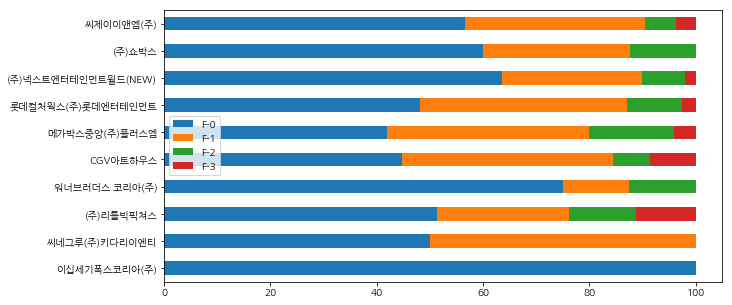

In [112]:
plt.rcParams["figure.figsize"] = (10,5)
f_counting.iloc[-10:, -4:].plot(kind='barh', stacked=True)

가장 많은 상영횟수를 차지하고 있는 10개의 대형배급사가 F-0 영화를 42% 이상 배급하고 있다.  
F-3(트리플 F등급) 영화는 8개의 대형배급사에서 5%도 차지하지 못했으며, F-1, F-2까지 확장해도 대부분 50%를 넘지 못한다.  
이 10개의 배급사가 한국영화 상영 전체 횟수의 87%를 차지하고 있는 와중에 이들이 남성영화의 배급을 훨씬 많이 하고 있으니 여성영화들은 대중에게 선보일 기회를 적게 갖게 되고, 흥행으로 이어지지 못하는 것은 당연한 결과다.

(제작사로도 비교해봤데 가장 많이 만든 곳이 10개의 영화를 만들었고 '한국영상아카데미'. 배급사만큼 몇몇 대형제작사가 아주 많은 영화를 제작하는 현상이 없어서 비교가 어려움.)

In [113]:
# 다영

# 성별에 따른 감독 제작비 구하기
전국관객수 기준으로 성별에 따른 TOP5 영화의 값을 찾는다. 그 후, 인터넷 검색을 통해 제작비를 비교할 예정.

In [114]:
start=df.sort_values(by=['전국관객수'],axis=0, ascending=False)

print(start.shape)
start.sample()

(686, 49)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,datetime,year,month,day,weekday,weekday_name,year-month,대표장르,상영횟수등급,회당 평균 매출액,스크린당 평균 매출액
516,공작,20179101,2018-08-08,한국,한국,드라마,12세이상관람가,장편,일반영화,"(주)영화사 월광,(주)사나이픽처스",씨제이이앤엠(주),99122,1317,42759410176.000000,4971261,10296507676,1158151,0,윤종빈,윤종빈,10054495,남자,감독,공작|춘몽|검사외전|허삼관|군도: 민란의 시대|범죄와의 전쟁: 나쁜놈들 전성시대|비...,"윤종빈, 권성휘",윤종빈,윤종빈,10054495,남자,감독,공작|춘몽|검사외전|허삼관|군도: 민란의 시대|범죄와의 전쟁: 나쁜놈들 전성시대|비...,"황정민,이성민,조진웅,주지훈,김대현,이경호,이기용,이동희,이상원,이상현,박현민,박혜...",황정민,환승희,10090290,남자,배우,인질(가제)|다만 악에서 구하소서|공작|군함도|군함도 감독판|아수라|곡성|검사외전|...,2018-08-08,2018,8,8,2,Wednesday,2018-08,드라마,16,431381.632493,32467281.834472


## 남자 감독 top5 참고: 제목_감독이름 (관객수)
- 극한직업_이병헌(16264944)
- 신과 함께 죄와 벌_김용화 (14410754)
- 베테랑_류승완 (13395400)
- 암살_최동윤 (12705700)
- 신과 함께 인과 연_김용화 (12253247)

In [ ]:
start_man= start[start['감독성별']=='남자']
start_man.head(5)

## 여자 감독 top5 참고: 제목_감독이름 (관객수)
- 돈_박누리(3389035)
- 탐정:리턴즈_이언희 (3148038)
- 말모이_엄유나 (2812444)
- 리틀포레스트_엄순례 (1505560)
- 부라더_장유정 (1468301)

In [ ]:
start_woman= start[start['감독성별']=='여자']
start_woman.head(5)

In [ ]:
# vertical bar plot 성별-컬러

# 성별에 따른 흥행작품의 손익분기점과 제작비 입력. 
* 제작비는 '억' 단위. 
* 관객수- 손익분기점 이름을 무엇으로 정할 지 몰라서 일단 이름...은 이렇게 설정함.

In [34]:
money=pd.read_csv('../01.Data_Collection/movie_money_power.csv')
money

FileNotFoundError: [Errno 2] File b'../01.Data_Collection/movie_money_power.csv' does not exist: b'../01.Data_Collection/movie_money_power.csv'

In [ ]:
# vertical bar plot 성별-컬러

# 배우 필모갯수

In [36]:
filmo=df[['주연배우', '배우성별', '배우필모']]

print(filmo.shape)
filmo.sample()

In [39]:
# 필모 컬럼 생성
filmo['필모갯수'] = filmo['배우필모'].apply(lambda x: x.count('|') + 1)

filmo = filmo.drop_duplicates()
print(filmo.shape)
filmo.sample()

(509, 4)


,주연배우,배우성별,배우필모,필모갯수
226,김영은,여자,신비아파트: 금빛 도깨비와 비밀의 동굴|베이블레이드 버스트 갓 : 갓 발키리의 탄생...,4


In [40]:
filmo.sort_values(by=['필모갯수'], axis=0, ascending=False)

,주연배우,배우성별,배우필모,필모갯수
31,안성기,남자,"광화문|종이꽃|사자|인간, 공간, 시간 그리고 인간|청춘 합창단 - 또 하나의 꿈|...",101
422,기주봉,남자,나의 알바인생|노리개: 그녀의 눈물|69세|소설가 구보의 하루|강변호텔|행복의 나라...,95
660,정두홍,남자,"인랑|군함도|그래, 가족|밀정|난폭한 기록|제 7기사단|베테랑|해무(海霧)|피크닉|...",72
92,오정세,남자,콜|나는 나를 해고하지 않는다 - 파견|스윙키즈|그대 이름은 장미|머니백|조작된 도...,64
113,최종원,남자,"광화문|여자전쟁: 봉천동 혈투|늙은 자전거|의뢰인|식객2 : 김치전쟁|여름, 속삭임...",63
233,박근형,남자,증인|사랑하기 때문에|그랜드파더|탐정 홍길동: 사라진 마을|장수상회|저스틴|가문의 ...,62
171,오달수,남자,이웃 사촌|조선명탐정: 흡혈괴마의 비밀|신과함께-죄와 벌|니 부모 얼굴이 보고 싶다...,59
380,문소리,여자,배심원들|메기|군산: 거위를 노래하다|리틀 포레스트|1987|여배우는 오늘도|특별시...,55
250,유해진,남자,봉오동 전투|승리호(가제)|말모이|완벽한 타인|레슬러|1987|택시운전사|공조|럭키...,54
469,이순재,남자,로망|덕구|아티스트: 다시 태어나다|저스틴|로맨틱 헤븐|그대를 사랑합니다|굿모닝 프...,53


In [ ]:
# vertical bar plot 성별-컬러

## 여성 배우 필모갯수

In [42]:
filmo_woman= filmo[filmo['배우성별']=='여자']
filmo_woman.sort_values(by=['필모갯수'], axis=0, ascending=False)

,주연배우,배우성별,배우필모,필모갯수
380,문소리,여자,배심원들|메기|군산: 거위를 노래하다|리틀 포레스트|1987|여배우는 오늘도|특별시...,55
482,이자벨 위페르,여자,스노우 화이트|마담 싸이코|해피엔드|미세스 하이드|클레어의 카메라|엘르|다가오는 것...,46
630,김해숙,여자,크게 될 놈|허스토리|신과함께-죄와 벌|미스 푸줏간|재심|아가씨|아가씨(확장판)|희...,46
636,라미란,여자,정직한 후보|걸캅스|내안의 그놈|점박이 한반도의 공룡2 : 새로운 낙원|상류사회|특...,43
268,이상희,여자,니나 내나|당신의 부탁|7년의 밤|국도극장|호랑이보다 무서운 겨울손님|아이 캔 스피...,38
35,김혜수,여자,국가부도의 날|미옥|굿바이 싱글|차이나타운|관상|도둑들|도둑들 영화를 만들다|이층의...,35
366,정유미,여자,82년생 김지영|염력|더 테이블|부산행|히말라야|맨홀|우리별 일호와 얼룩소|깡철이|...,32
196,윤여정,여자,지푸라기라도 잡고 싶은 짐승들|찬실이는 복도 많지|그것만이 내 세상|죽여주는 여자|...,31
232,한예리,여자,인랑|챔피언|더 테이블|춘몽|최악의 하루|사냥|극적인 하룻밤|필름시대사랑|해무(海霧...,31
109,김꽃비,여자,메기|임을 위한 행진곡|미완의 여행길로 떠나다|호텔룸|거짓말|원 컷 - 어느 친절한...,31
